# Importacion de librerias

In [4]:
import sys
sys.path.append('./libraryFunc/')


In [5]:
%run lib.ipynb


In [44]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np
import scipy

import matplotlib.pyplot as plt

import libraryFunc.libFunc as lib

import warnings
warnings.simplefilter('ignore')

In [7]:
def mean(x):
    return stats.mean(x)

In [8]:
def median(x):
    return stats.median(x)

## Carga  y validacion de datos

In [9]:
df = pd.read_excel("../data/raw/Data_Nutricion_grupos.xlsx")

In [10]:
df.shape

(652, 17)

In [11]:
df.dtypes

Individuo                       object
talla                          float64
edad                           float64
peso_kg                        float64
circun_cuello                  float64
IMC                            float64
circun_cintura                 float64
cadera                         float64
ind_cintura_cadera             float64
ind_cintura_estatura           float64
por_grasa_corporal             float64
masa_corporal_magra_kg         float64
pliegue_cutaneo_BICEPS         float64
pliegue_cutaneo_TRICEPS        float64
pliegue_cutaneo_ESCAPULAR      float64
pliegue_cutaneo_SUPRAILIACO    float64
Grupos                          object
dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Individuo                    652 non-null    object  
 1   talla                        652 non-null    float64 
 2   edad                         652 non-null    float64 
 3   peso_kg                      652 non-null    float64 
 4   circun_cuello                652 non-null    float64 
 5   IMC                          652 non-null    float64 
 6   circun_cintura               652 non-null    float64 
 7   cadera                       652 non-null    float64 
 8   ind_cintura_cadera           652 non-null    float64 
 9   ind_cintura_estatura         652 non-null    float64 
 10  por_grasa_corporal           652 non-null    float64 
 11  masa_corporal_magra_kg       652 non-null    float64 
 12  pliegue_cutaneo_BICEPS       652 non-null    float64 
 13  plieg

In [13]:
print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",   df.shape[0])

La cantidad de columnas en los datos es:  17
La cantidad de filas en los datos es:  652


In [14]:
df.head(5)

Individuo  talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  29.576170            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  22.364707            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  21.623567            72.0   
3  Persona 4  151.7  16.0     54.6           32.6  23.117479             NaN   
4  Persona 5  160.3  16.0     58.0           30.1  22.260196             NaN   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0            0.918367              0.578035           36.446202   
1   100.5            0.804975              0.485886           28.790714   
2    86.0            0.837209              0.475876           29.867419   
3    88.4            0.841629              0.490442           27.867640   
4    97.9            0.813075                   NaN           30.276688   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0               45.250304                    13.0                     27.0   
1               43.437664                     5.0                     19.0   
2               34.435097                    13.0                     18.0   
3               39.384269                     5.0                     19.0   
4               40.439521                    10.0                     19.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO Grupos  
0                       32.0                         34.0      A  
1                       15.0                         22.0      A  
2                       18.0                         17.0      A  
3                       15.0                         18.0      A  
4                       20.0                         19.0      A

# Variables cualitativas y cuantitativas

In [63]:
var_num = df.select_dtypes(include=['float64', 'int']).columns
var_cat = df.select_dtypes(include=['object', 'category']).columns

print(var_num)
print(var_cat)


Index(['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura',
       'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
       'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'],
      dtype='object')
Index(['Individuo', 'Grupos', 'categoriaIMC', 'categoriaEdad'], dtype='object')


### Validacion de valores nulos

In [16]:
df.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

### Observacion 1
Las columnas [talla, edad, peso_kg , circun_cuello, IMC, circun_cintura, cadera , ind_cintura_cadera,
ind_cintura_estatura, por_grasa_corporal, masa_corporal_magra_kg] contienen valores nulos por lo que se procedera a imputar datos en base a su media.

Descripcion de la imputacion
Se finalizo la imputacion de valores nulos utilizando la media, actualmente ya todos los datos se encuentran completos y se porcedera a hacer el analisis completo de los datos

In [17]:
def media(x):
    return stats.mean(x)

In [18]:
df[var_num] = df[var_num].apply(lambda x: x.fillna(x.median()), axis=0)

In [19]:
df.isna().sum()

Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
dtype: int64

### Analisis estadistico de las columnas

In [20]:
df.describe()

talla        edad     peso_kg  circun_cuello         IMC  \
count  652.000000  652.000000  652.000000     652.000000  652.000000   
mean   158.794785   14.756135   56.903221      32.131902   22.421825   
std      7.316419    1.048901    8.442418       2.108332    3.018874   
min    135.600000    0.000000   33.900000      24.500000   14.537886   
25%    153.800000   14.000000   51.200000      30.700000   20.306828   
50%    158.200000   15.000000   55.800000      32.000000   22.174447   
75%    163.300000   15.000000   61.450000      33.500000   23.855081   
max    188.600000   17.000000   91.100000      39.200000   36.708603   

       circun_cintura      cadera  ind_cintura_cadera  ind_cintura_estatura  \
count      652.000000  652.000000          652.000000            652.000000   
mean        74.496319   89.861810            0.830985              0.470474   
std          6.837227    7.183395            0.054173              0.045890   
min         55.000000   69.800000            0.654018              0.362319   
25%         70.000000   85.000000            0.795298              0.439406   
50%         73.600000   89.000000            0.827897              0.464779   
75%         78.000000   94.000000            0.866667              0.493610   
max        107.500000  120.800000            1.026528              0.704411   

       por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
count          652.000000              652.000000              652.000000   
mean            23.546831               43.373205                9.181748   
std              7.849954                6.908055                5.661837   
min              4.214310               28.498090                2.000000   
25%             16.127803               38.164889                5.000000   
50%             26.094372               42.357287                8.000000   
75%             30.073493               48.064794               12.000000   
max             39.445282               71.568947               90.000000   

       pliegue_cutaneo_TRICEPS  pliegue_cutaneo_ESCAPULAR  \
count               652.000000                 652.000000   
mean                 15.647239                  14.383436   
std                   5.692567                   5.307465   
min                   5.000000                   5.000000   
25%                  11.000000                  10.000000   
50%                  16.000000                  14.000000   
75%                  19.000000                  18.000000   
max                  39.000000                  35.000000   

       pliegue_cutaneo_SUPRAILIACO  
count                   652.000000  
mean                     14.679448  
std                       5.953868  
min                       3.000000  
25%                      10.000000  
50%                      15.000000  
75%                      19.000000  
max                      35.000000

In [21]:
df[var_num].apply([mean,media,moda,std,var,min,max,rango]).round(2)

talla   edad  peso_kg  circun_cuello    IMC  circun_cintura  cadera  \
mean   158.79  14.76    56.90          32.13  22.42           74.50   89.86   
media  158.79  14.76    56.90          32.13  22.42           74.50   89.86   
moda   158.20  14.00    55.80          32.00  22.17           71.00   90.00   
std      7.32   1.05     8.44           2.11   3.02            6.84    7.18   
var     53.53   1.10    71.27           4.45   9.11           46.75   51.60   
min    135.60   0.00    33.90          24.50  14.54           55.00   69.80   
max    188.60  17.00    91.10          39.20  36.71          107.50  120.80   
rango   53.00  17.00    57.20          14.70  22.17           52.50   51.00   

       ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
mean                 0.83                  0.47               23.55   
media                0.83                  0.47               23.55   
moda                 0.83                  0.46               28.79   
std                  0.05                  0.05                7.85   
var                  0.00                  0.00               61.62   
min                  0.65                  0.36                4.21   
max                  1.03                  0.70               39.45   
rango                0.37                  0.34               35.23   

       masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
mean                    43.37                    9.18   
media                   43.37                    9.18   
moda                    42.36                    5.00   
std                      6.91                    5.66   
var                     47.72                   32.06   
min                     28.50                    2.00   
max                     71.57                   90.00   
rango                   43.07                   88.00   

       pliegue_cutaneo_TRICEPS  pliegue_cutaneo_ESCAPULAR  \
mean                     15.65                      14.38   
media                    15.65                      14.38   
moda                     18.00                      10.00   
std                       5.69                       5.31   
var                      32.41                      28.17   
min                       5.00                       5.00   
max                      39.00                      35.00   
rango                    34.00                      30.00   

       pliegue_cutaneo_SUPRAILIACO  
mean                         14.68  
media                        14.68  
moda                         18.00  
std                           5.95  
var                          35.45  
min                           3.00  
max                          35.00  
rango                        32.00

### Observacion 2

Se observo que la edad tiene como valor minimo 0, se procedera a remplazar los 0 por NA y luego realizar la imputacion en base a la media

In [22]:
df["edad"].value_counts()

14.0    245
15.0    231
16.0    140
13.0     26
17.0      8
0.0       1
12.0      1
Name: edad, dtype: int64

In [23]:
df['edad'] = df['edad'].astype(int)
df['edad'].head(5)

0    16
1    16
2    16
3    16
4    16
Name: edad, dtype: int32

In [24]:
missing_value=(df[["edad"]]==0).sum()
missing_value

edad    1
dtype: int64

In [25]:
df['edad'] = df['edad'].replace(0,np.nan)
df.isna().sum()

Individuo                      0
talla                          0
edad                           1
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
dtype: int64

In [26]:
df['edad'].value_counts()

14.0    245
15.0    231
16.0    140
13.0     26
17.0      8
12.0      1
Name: edad, dtype: int64

In [27]:
df['edad'] = df['edad'].fillna(median(df['edad']))

In [28]:
df["edad"].value_counts()
df.isna().sum()

Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
dtype: int64

# Graficas de variables cuantitativas

## Graficas de Histograma, caja y violin

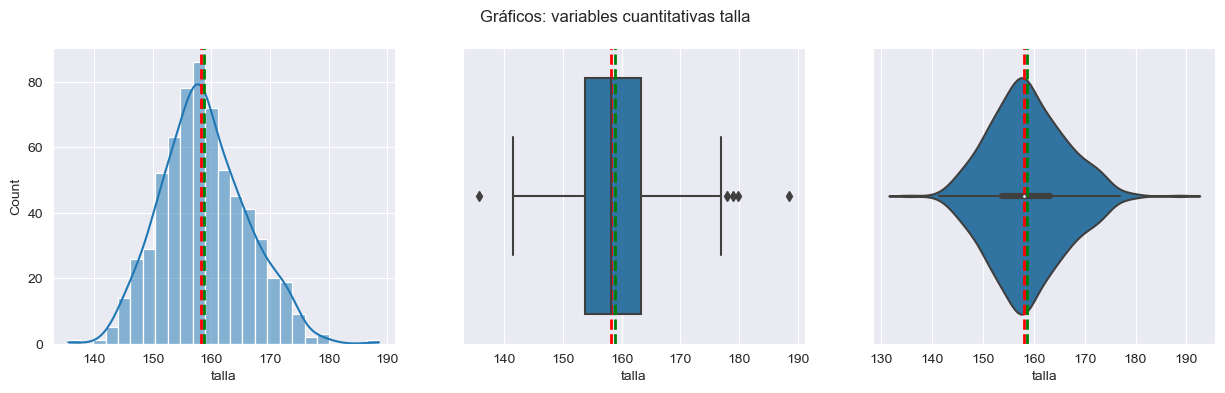

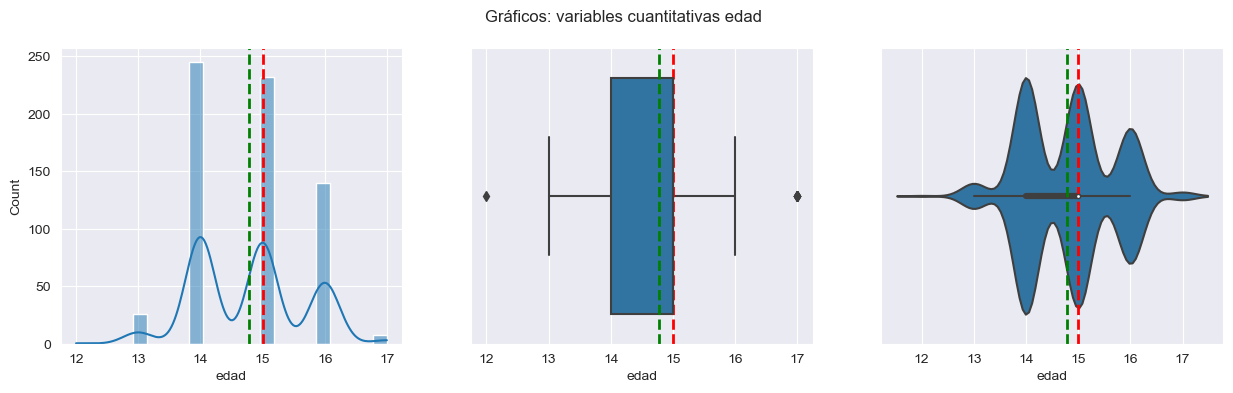

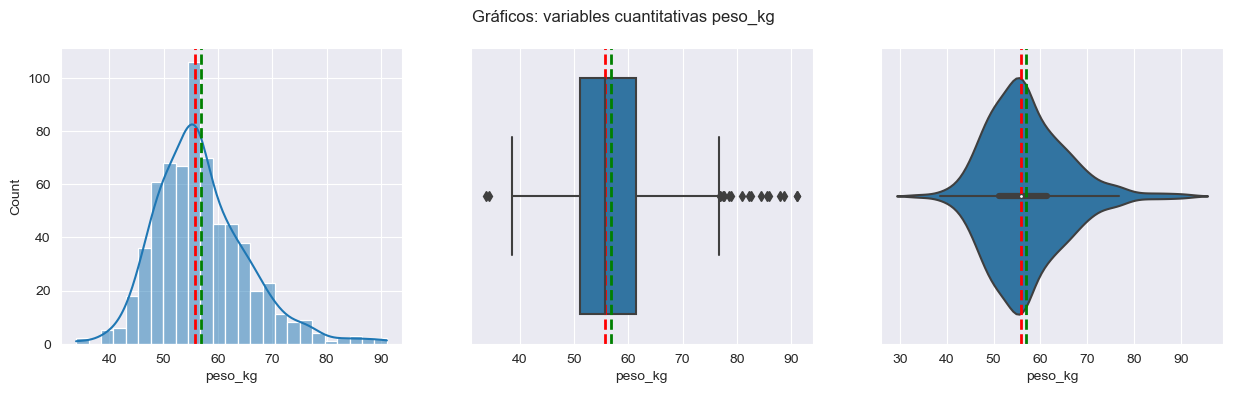

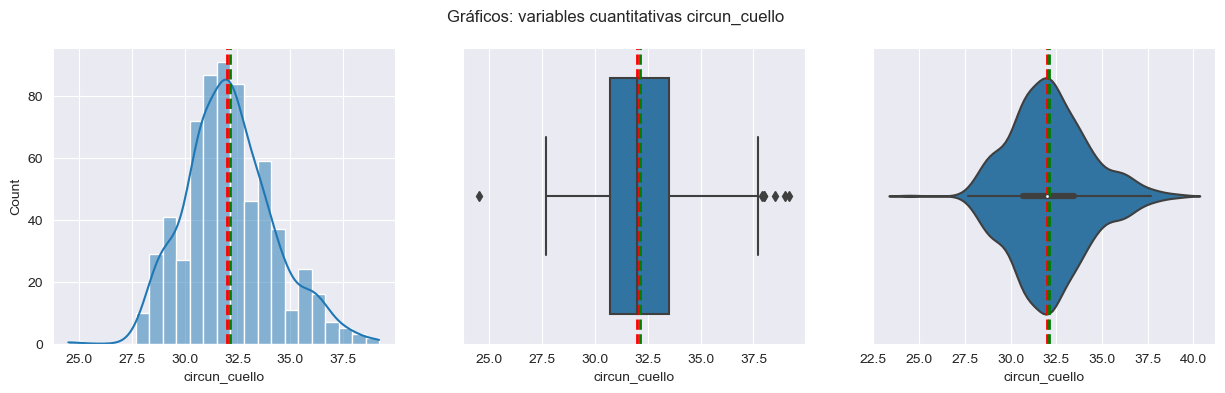

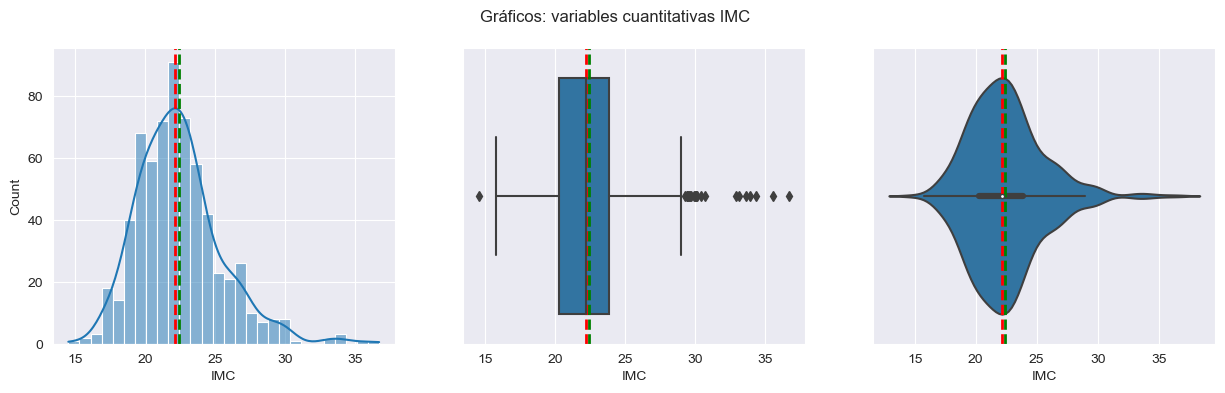

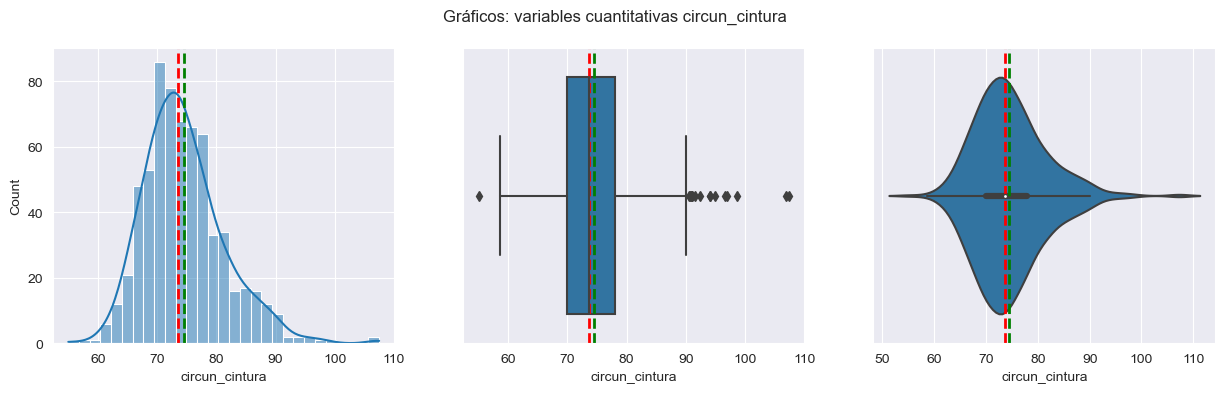

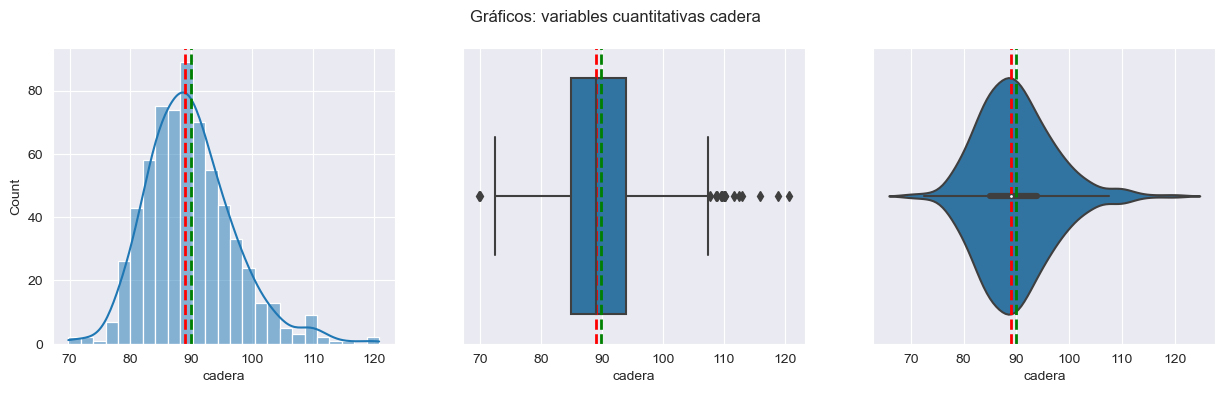

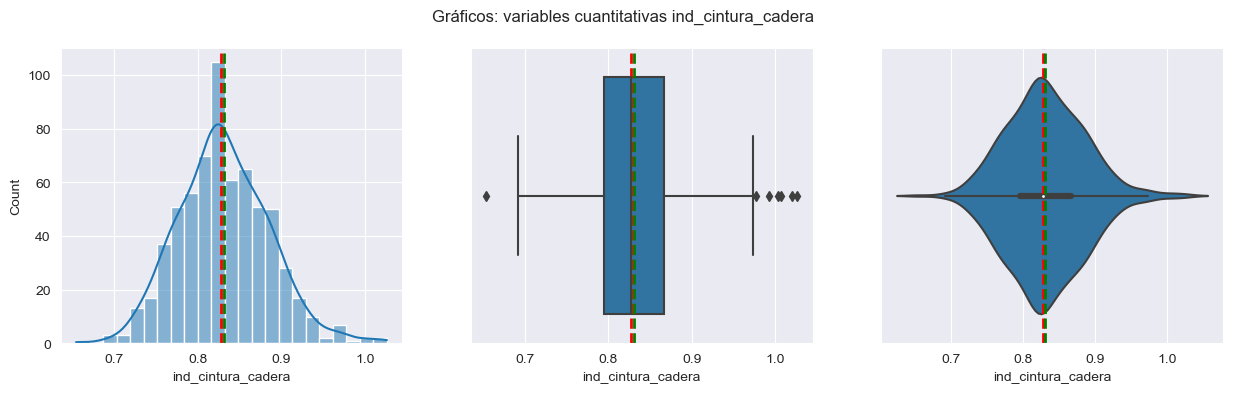

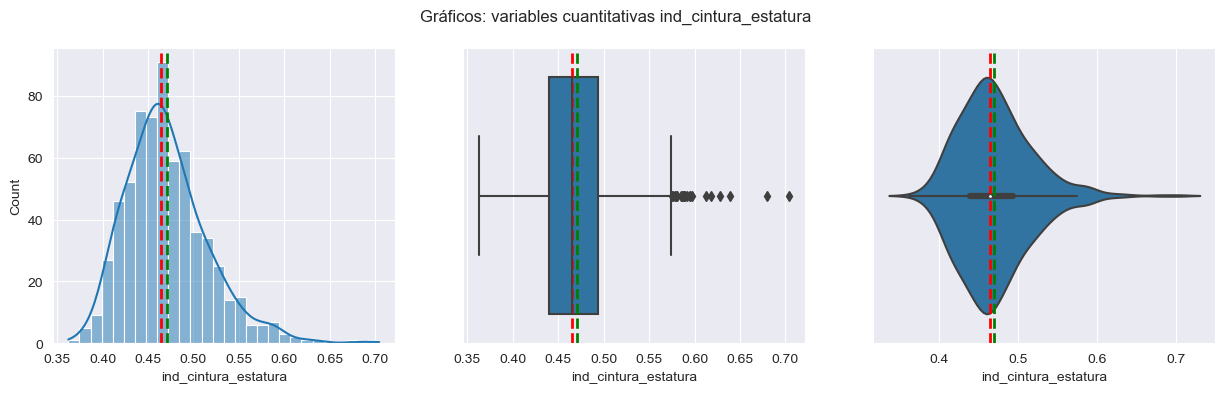

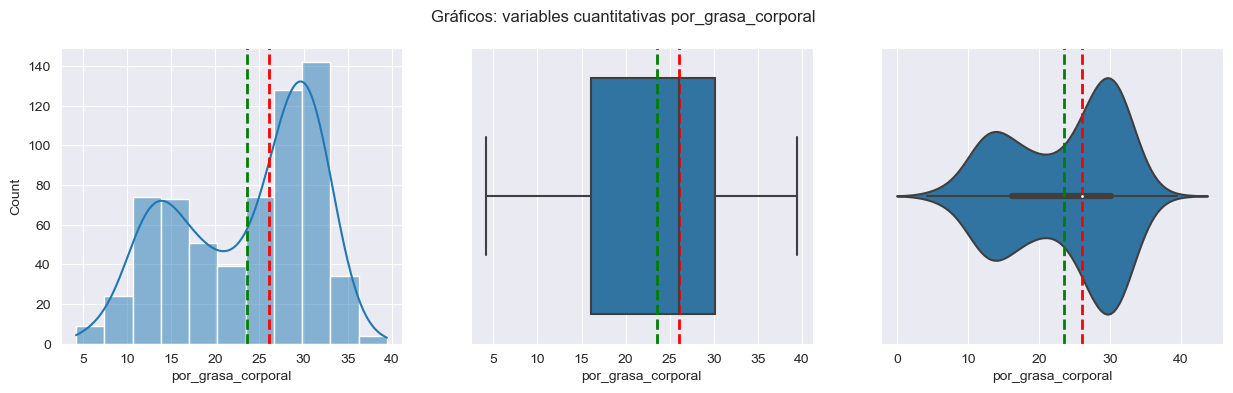

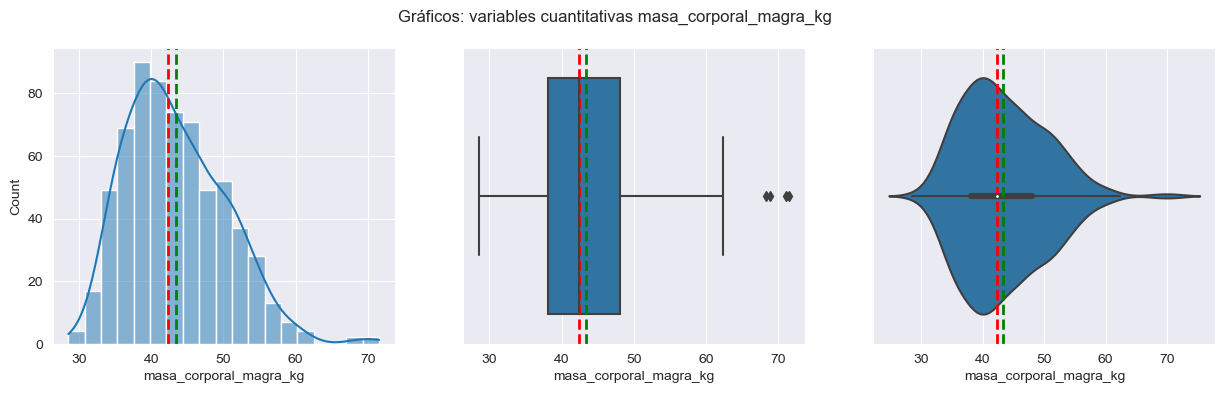

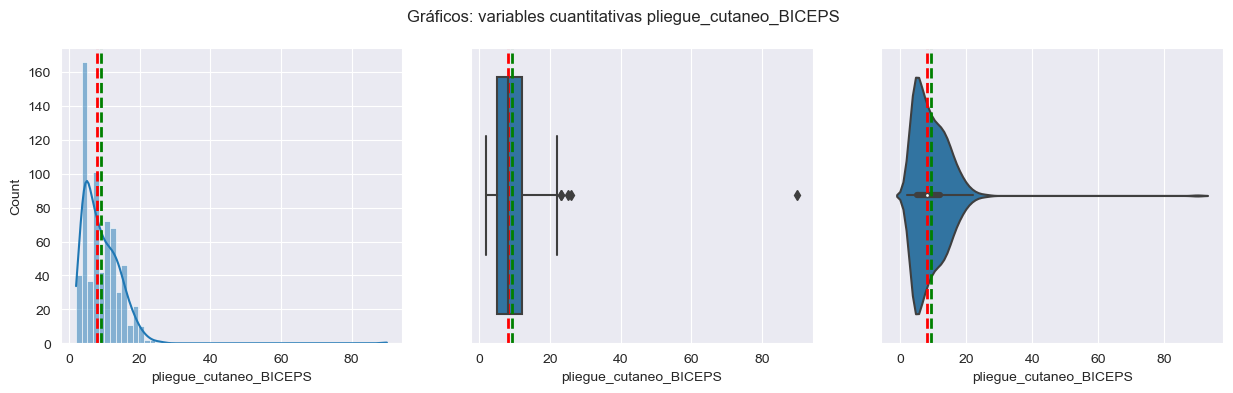

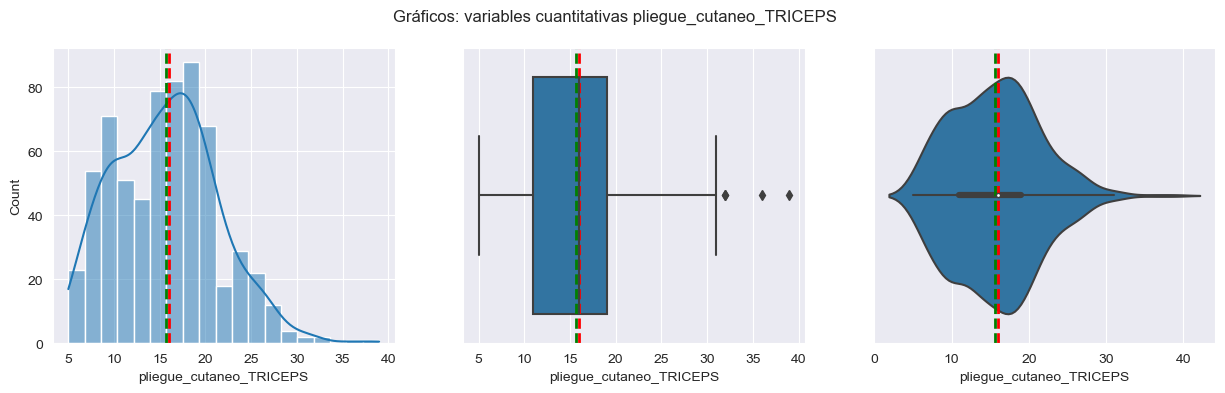

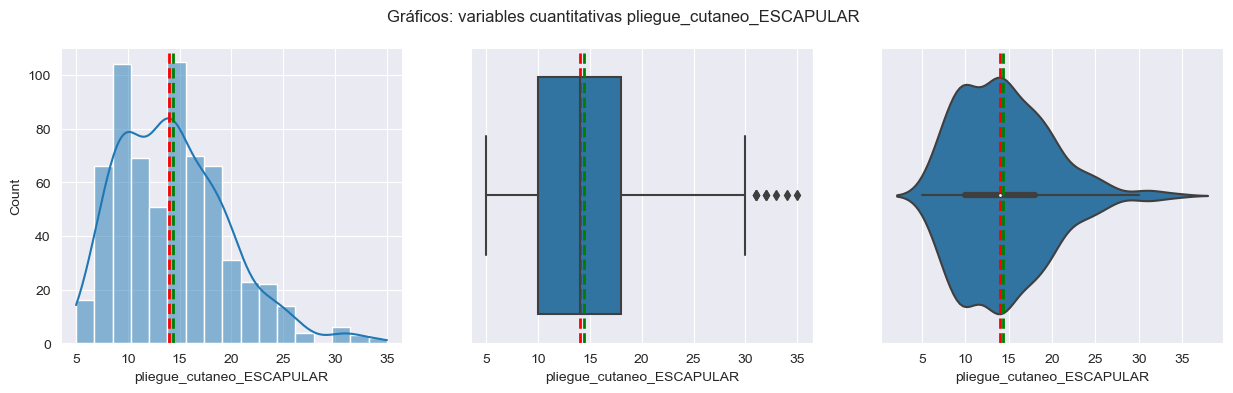

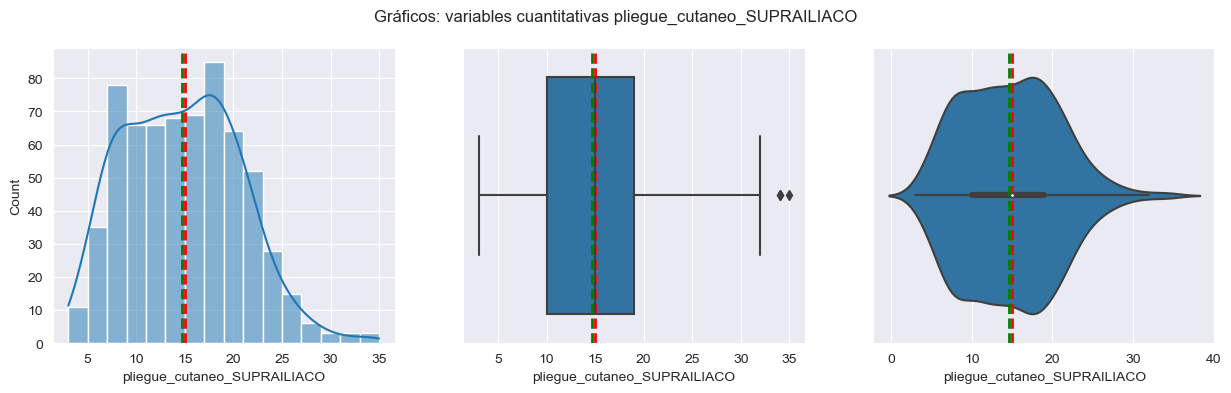

In [53]:
for i, colum in enumerate(var_num):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas ' + colum)

    sns.histplot(x=df[colum], data=df, kde= True, ax=ax[0])
    ax[0].axvline(median(df[colum]), color='red', linestyle='dashed', linewidth=2,label=f'Media: {median(df[colum]):.1f}')
    ax[0].axvline(mean(df[colum]), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mean(df[colum]):.1f}')

    sns.boxplot(x=df[colum], ax=ax[1])
    ax[1].axvline(median(df[colum]), color='red', linestyle='dashed', linewidth=2,label=f'Media: {median(df[colum]):.1f}')
    ax[1].axvline(mean(df[colum]), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mean(df[colum]):.1f}')

    sns.violinplot(data=df, x=colum, showfliers=False, ax=ax[2])
    ax[2].axvline(median(df[colum]), color='red', linestyle='dashed', linewidth=2,label=f'Media: {median(df[colum]):.1f}')
    ax[2].axvline(mean(df[colum]), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mean(df[colum]):.1f}')



## Analisis de las graficas cualitativas

1. Ninguna columna tiene una distribucion normal
2. La mayoria de columnas presentan una distribucion asimetrica positiva
3. La minoria de columnas presentan una distribucion asimetrica negativa



# Creacion de variables categoricas

## Funciones variable categorica

In [30]:
def crearcategoria(x):
    if x < 18.5:
        return "Bajo peso"
    elif 18.5 <= x < 25:
        return "Peso normal"
    elif 25 <= x < 30:
        return "Sobrepeso"
    elif 30 <= x < 35:
        return "Obesidad grado 1"
    elif 35 <= x < 40:
        return "Obesidad grado 2"
    elif x >= 40:
        return "Obesidad grado 3"
    else:
        return "na"


In [55]:
def crearcategoriaEdad(x):
    dict = {12.0:"12",13.0:"13",14.0:"14", 15.0:"15",16.0:"16",17.0:"17"}
    return dict.get(x,"0")

## Variable categorica IMC

In [31]:
df["categoriaIMC"] = df['IMC'].apply(crearcategoria)
df["categoriaIMC"].value_counts()

Peso normal         508
Sobrepeso            94
Bajo peso            38
Obesidad grado 1     10
Obesidad grado 2      2
Name: categoriaIMC, dtype: int64

In [32]:
df['categoriaIMC'] = pd.Categorical(df['categoriaIMC'],
    categories=['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obesidad grado 1', 'Obesidad grado 2', 'Obesidad grado 3'],
    ordered=True)

In [34]:
df.head(5)

Individuo  talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  29.576170            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  22.364707            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  21.623567            72.0   
3  Persona 4  151.7  16.0     54.6           32.6  23.117479            73.6   
4  Persona 5  160.3  16.0     58.0           30.1  22.260196            73.6   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0            0.918367              0.578035           36.446202   
1   100.5            0.804975              0.485886           28.790714   
2    86.0            0.837209              0.475876           29.867419   
3    88.4            0.841629              0.490442           27.867640   
4    97.9            0.813075              0.464779           30.276688   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0               45.250304                    13.0                     27.0   
1               43.437664                     5.0                     19.0   
2               34.435097                    13.0                     18.0   
3               39.384269                     5.0                     19.0   
4               40.439521                    10.0                     19.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO Grupos categoriaIMC  
0                       32.0                         34.0      A    Sobrepeso  
1                       15.0                         22.0      A  Peso normal  
2                       18.0                         17.0      A  Peso normal  
3                       15.0                         18.0      A  Peso normal  
4                       20.0                         19.0      A  Peso normal

## Variable cateogira Edad

In [56]:
df["categoriaEdad"] = df['edad'].apply(crearcategoriaEdad)
df["categoriaEdad"].value_counts()

14    245
15    232
16    140
13     26
17      8
12      1
Name: categoriaEdad, dtype: int64

In [58]:
df['categoriaEdad'] = pd.Categorical(df['categoriaEdad'], categories=['12', '13', '14', '15', '16', '17'], ordered=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Individuo                    652 non-null    object  
 1   talla                        652 non-null    float64 
 2   edad                         652 non-null    float64 
 3   peso_kg                      652 non-null    float64 
 4   circun_cuello                652 non-null    float64 
 5   IMC                          652 non-null    float64 
 6   circun_cintura               652 non-null    float64 
 7   cadera                       652 non-null    float64 
 8   ind_cintura_cadera           652 non-null    float64 
 9   ind_cintura_estatura         652 non-null    float64 
 10  por_grasa_corporal           652 non-null    float64 
 11  masa_corporal_magra_kg       652 non-null    float64 
 12  pliegue_cutaneo_BICEPS       652 non-null    float64 
 13  plieg

# Correlaciones de variables

## Matriz de correlaciones


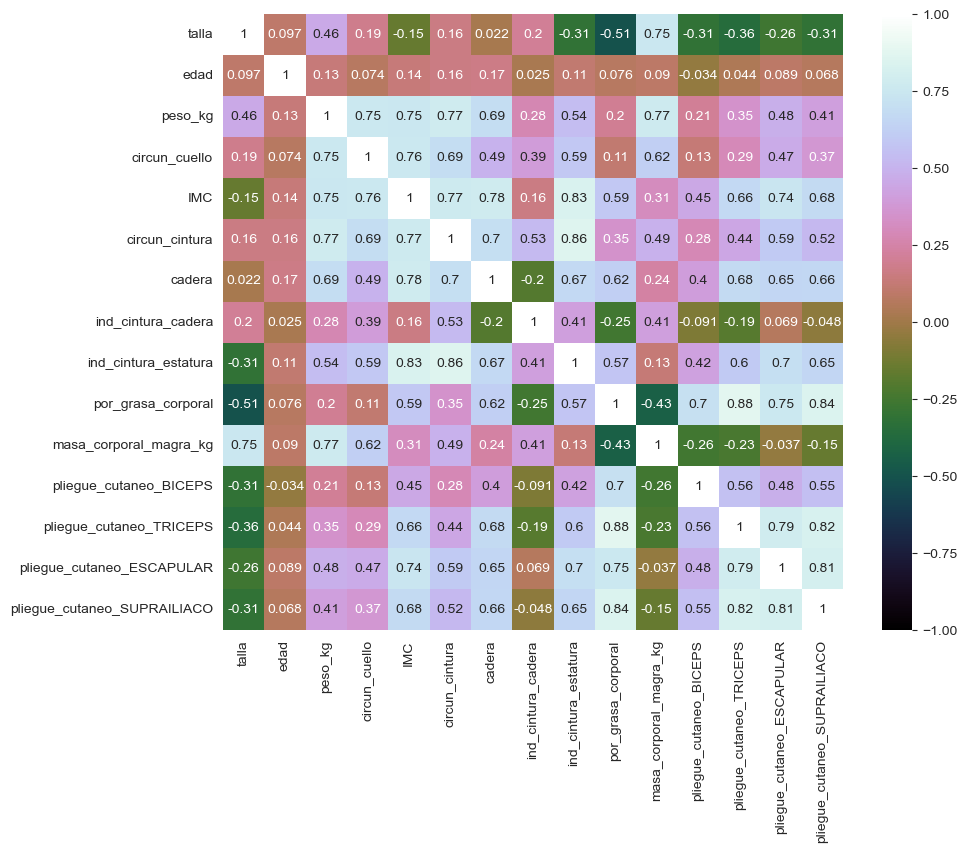

In [37]:
plt.figure(figsize=(10, 8))
corr_matrix = df[var_num].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', vmin=-1, vmax=1)
plt.show()

## Correlaciones por variable

C:\Users\Julio\AppData\Local\Temp\ipykernel_11104\3492943424.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df[var]).sort_values().plot (kind='bar', color='blue', figsize=(8,4))
C:\Users\Julio\AppData\Local\Temp\ipykernel_11104\3492943424.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df[var]).sort_values().plot (kind='bar', color='blue', figsize=(8,4))
C:\Users\Julio\AppData\Local\Temp\ipykernel_11104\3492943424.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeri

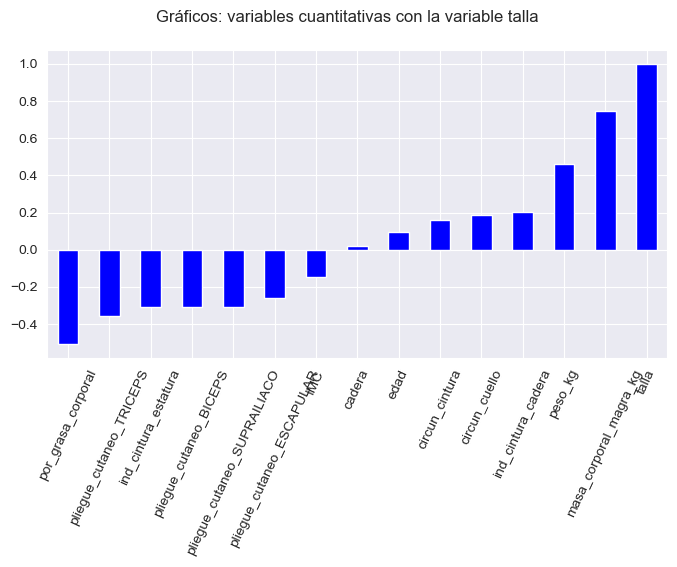

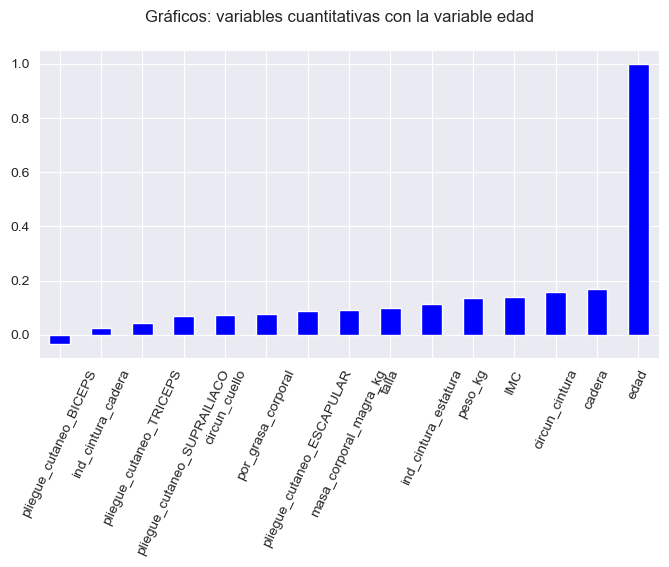

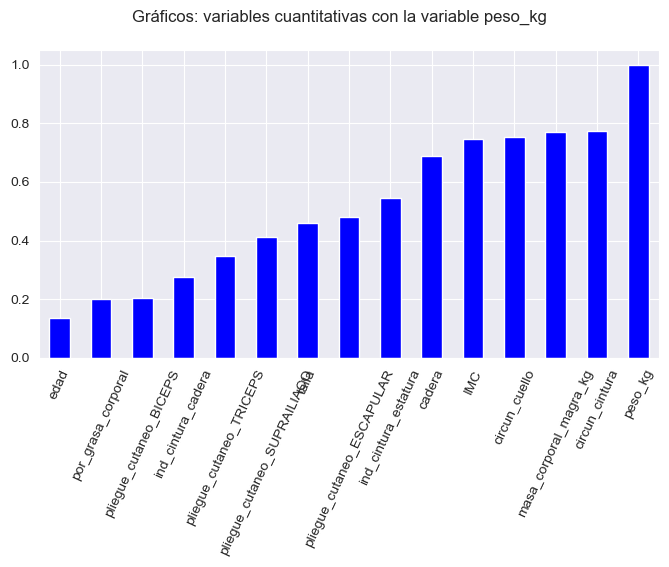

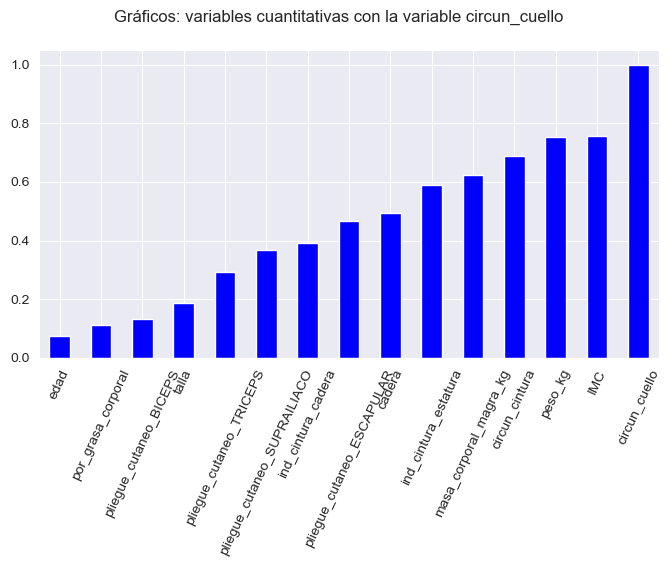

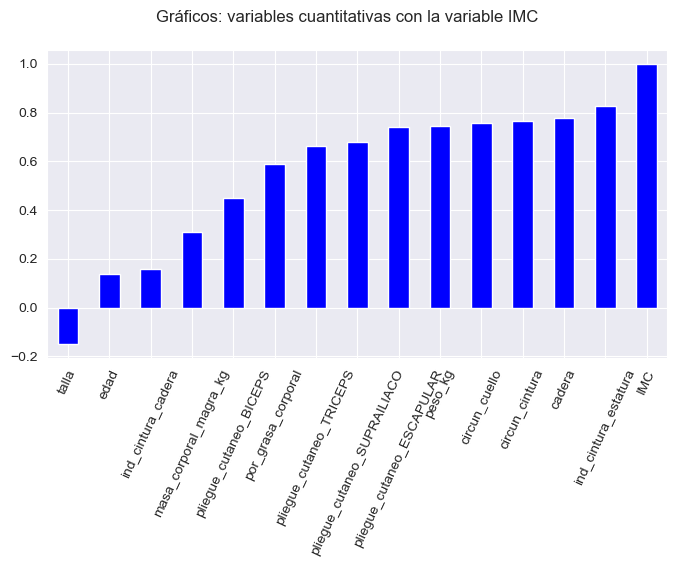

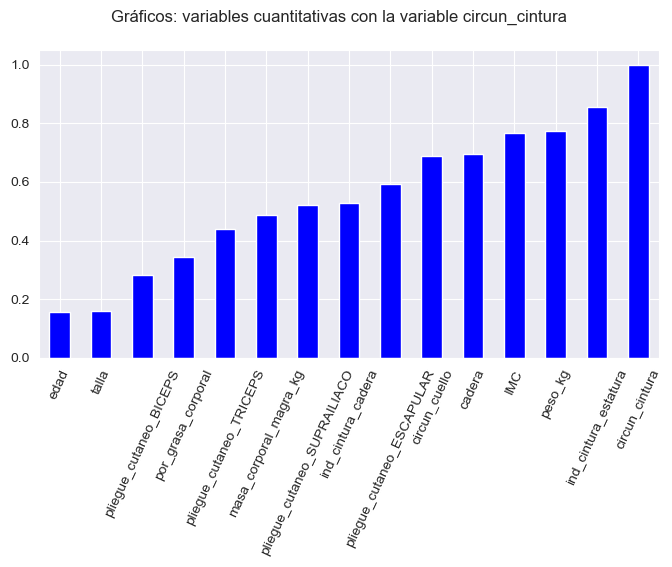

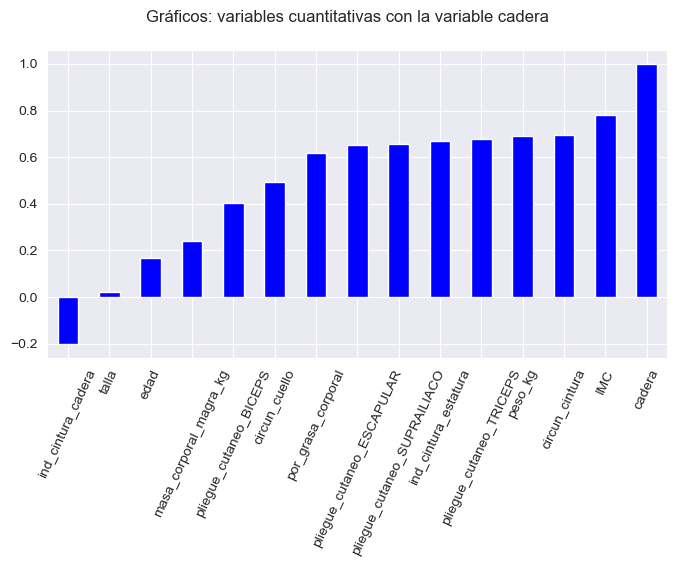

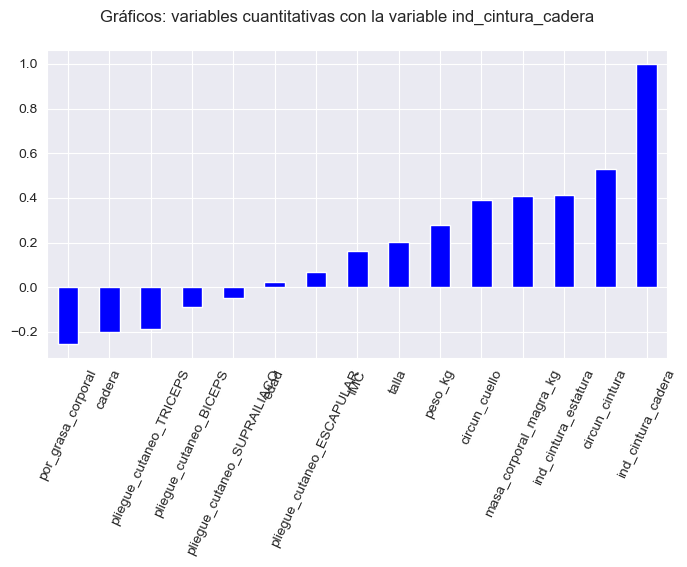

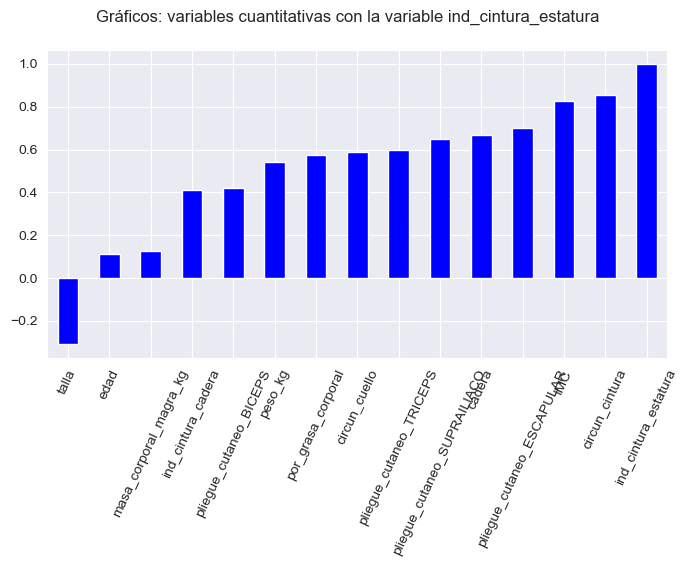

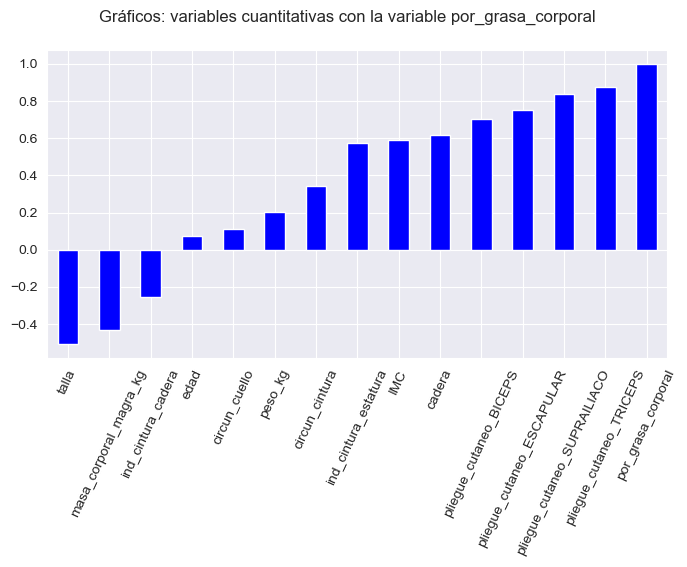

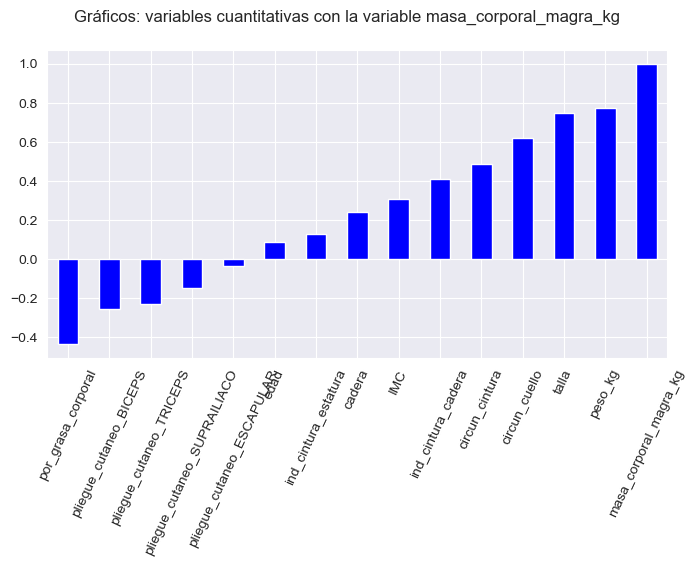

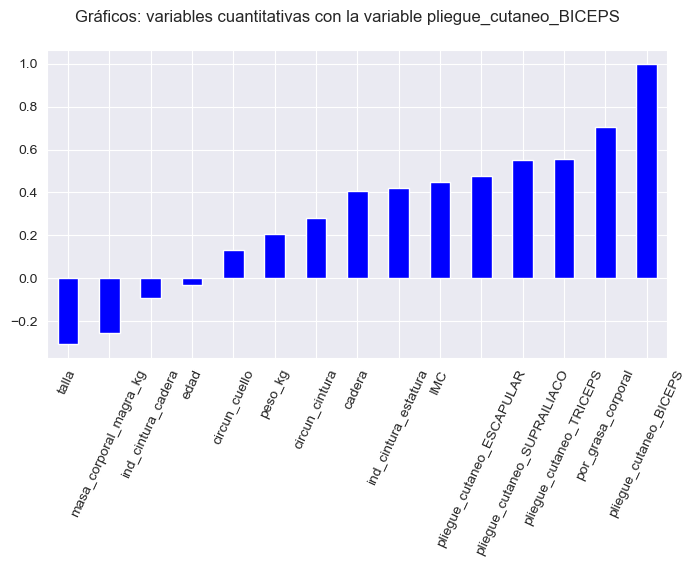

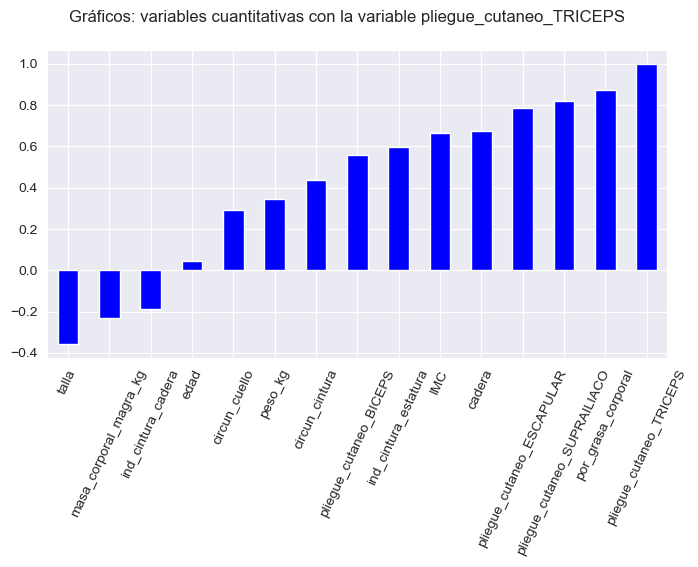

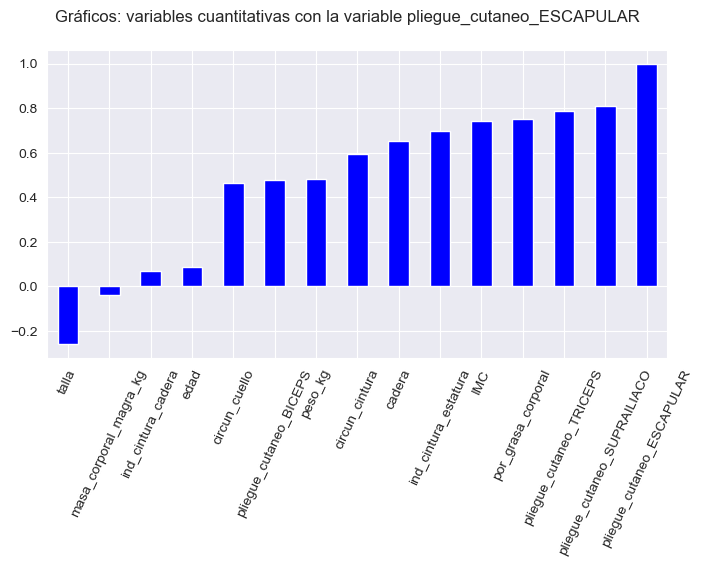

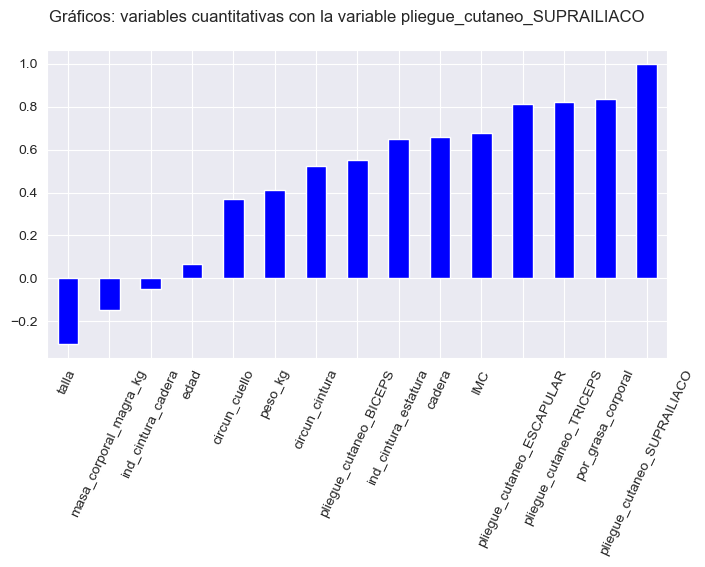

In [43]:
for i, colum in enumerate(var_num):
    fig2, ax2 = plt.subplots(1, 1, figsize=(15, 3.84))
    fig2.suptitle('Gráficos: variables cuantitativas con la variable ' + str(colum))
    var = colum
    df.corrwith(df[var]).sort_values().plot (kind='bar', color='blue', figsize=(8,4))
    plt.xticks(rotation=65)

# Comparacion de variables Cuantitativas

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Individuo                    652 non-null    object  
 1   talla                        652 non-null    float64 
 2   edad                         652 non-null    float64 
 3   peso_kg                      652 non-null    float64 
 4   circun_cuello                652 non-null    float64 
 5   IMC                          652 non-null    float64 
 6   circun_cintura               652 non-null    float64 
 7   cadera                       652 non-null    float64 
 8   ind_cintura_cadera           652 non-null    float64 
 9   ind_cintura_estatura         652 non-null    float64 
 10  por_grasa_corporal           652 non-null    float64 
 11  masa_corporal_magra_kg       652 non-null    float64 
 12  pliegue_cutaneo_BICEPS       652 non-null    float64 
 13  plieg

In [40]:
combinaciones = 18*(18-1)/2
combinaciones

153.0

## Graficas de dispersion

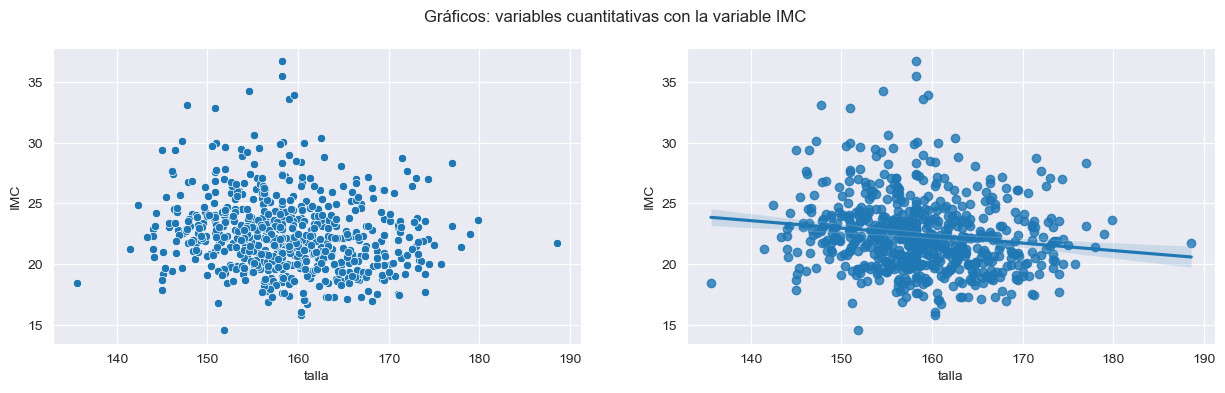

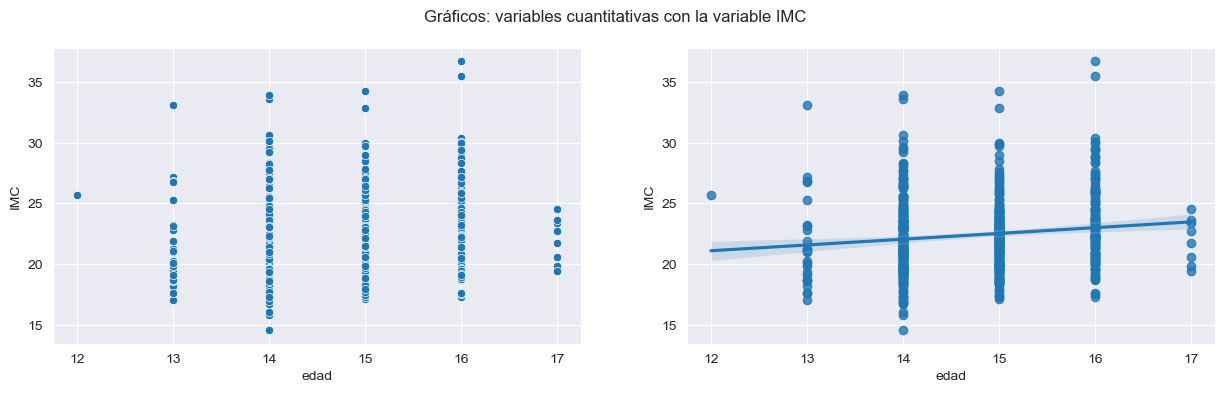

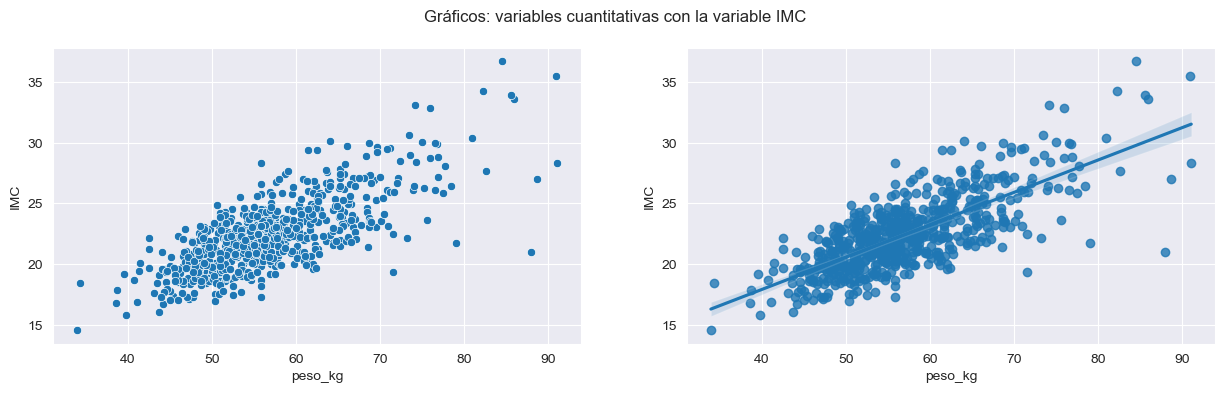

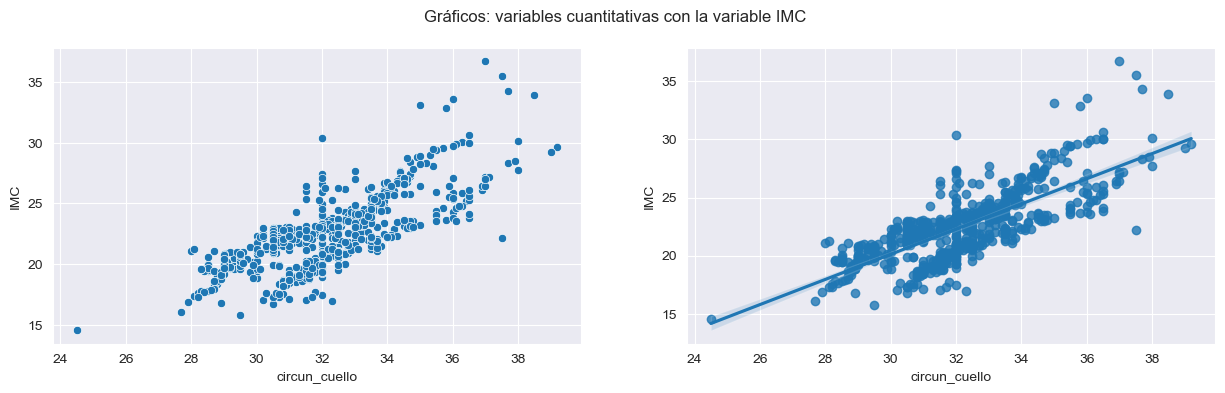

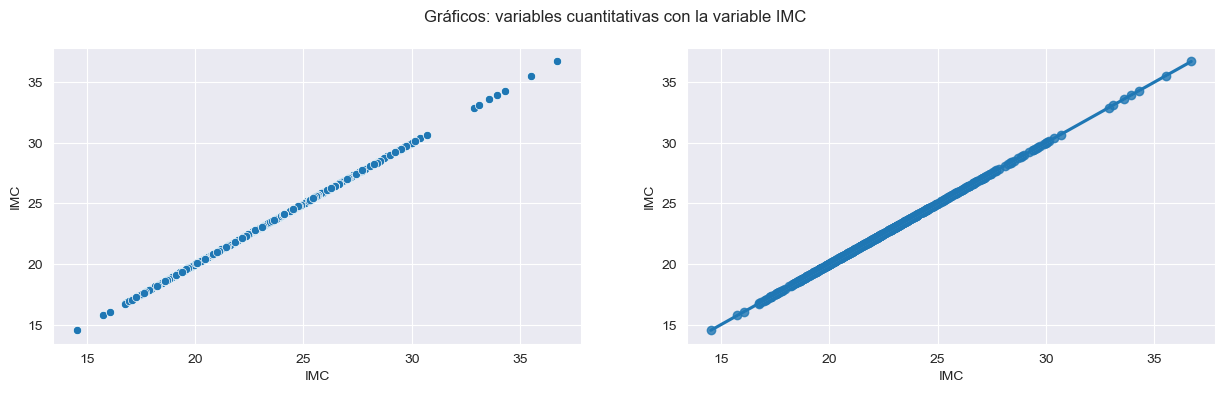

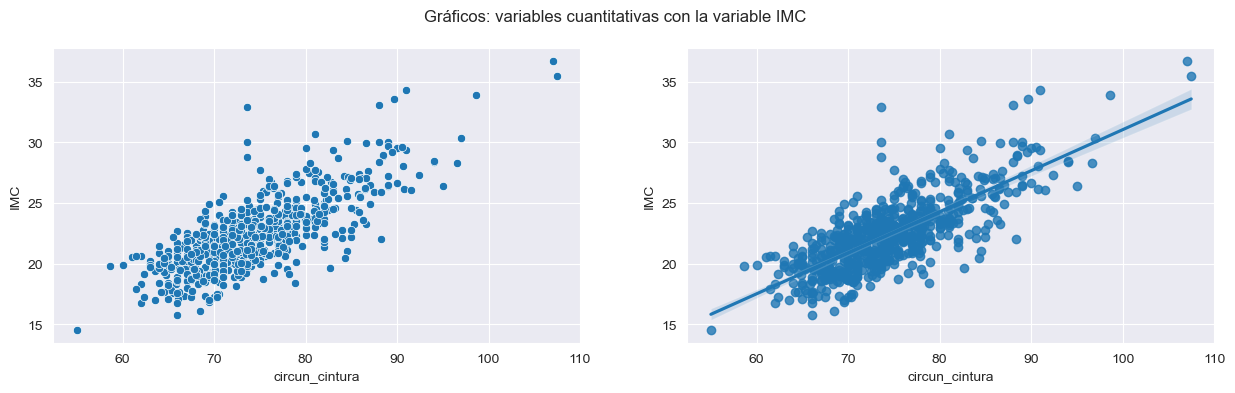

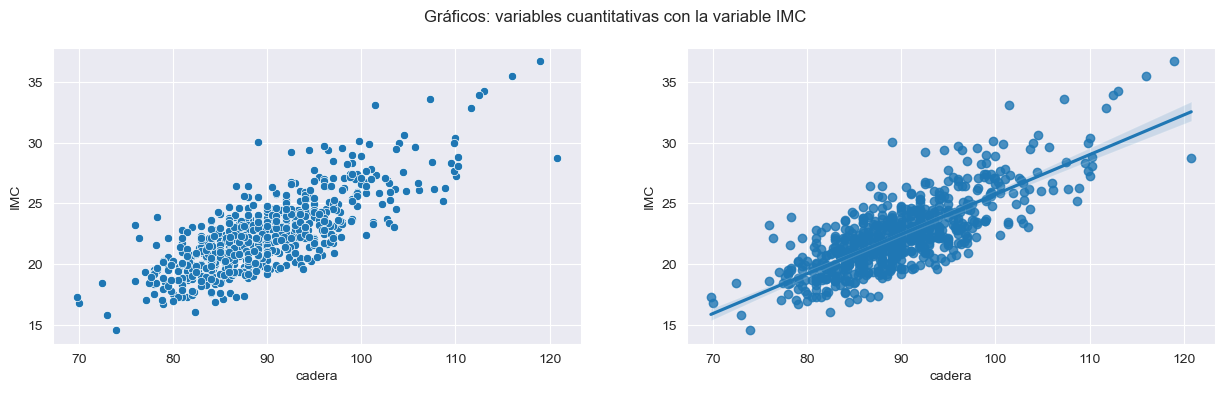

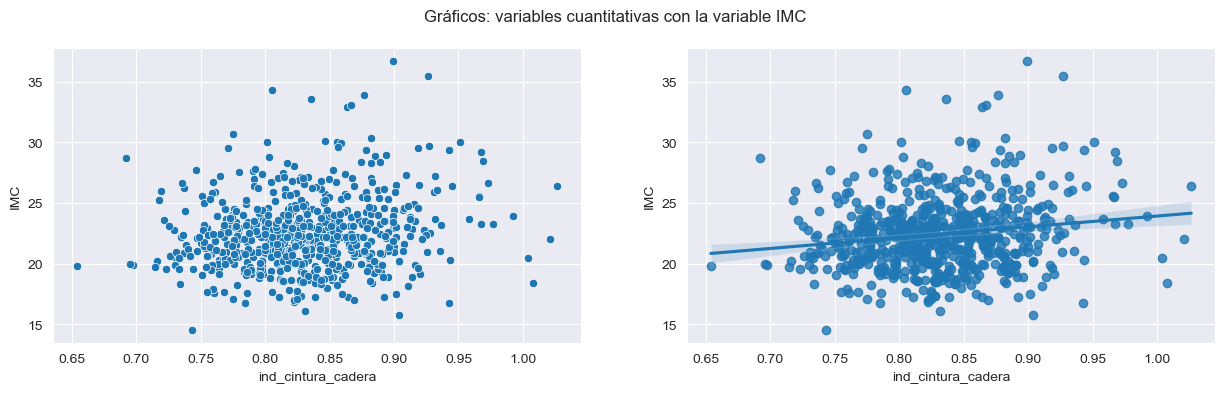

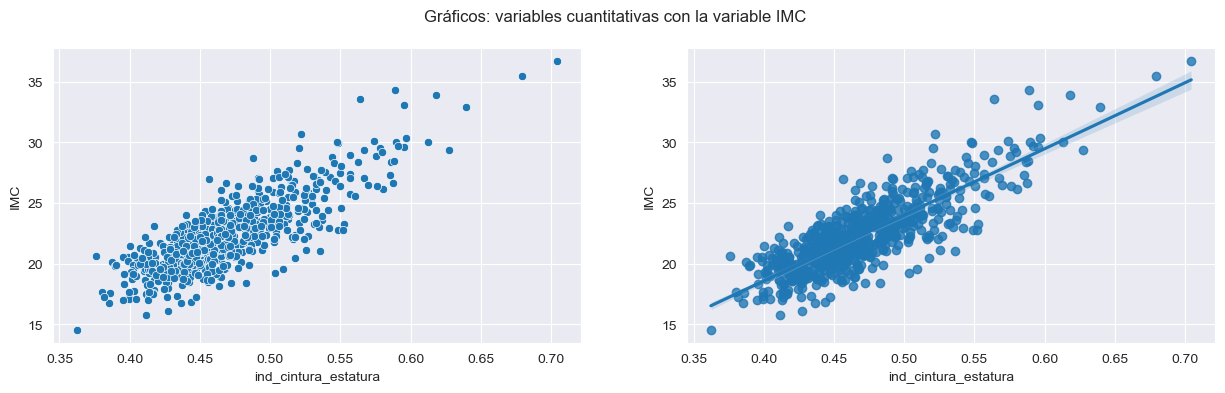

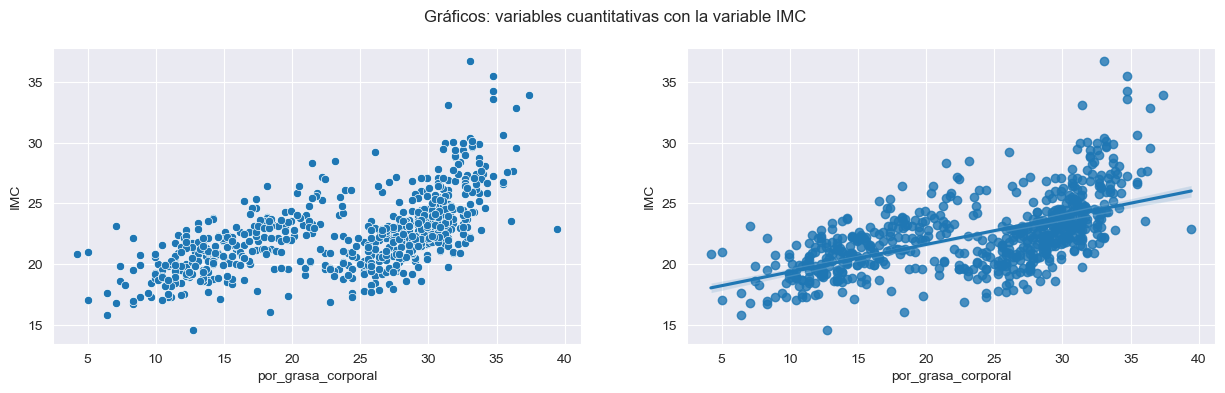

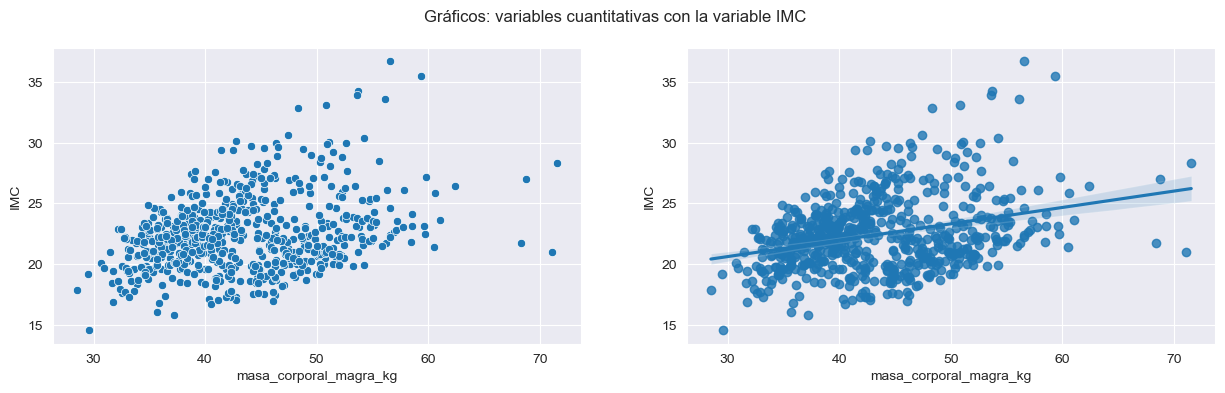

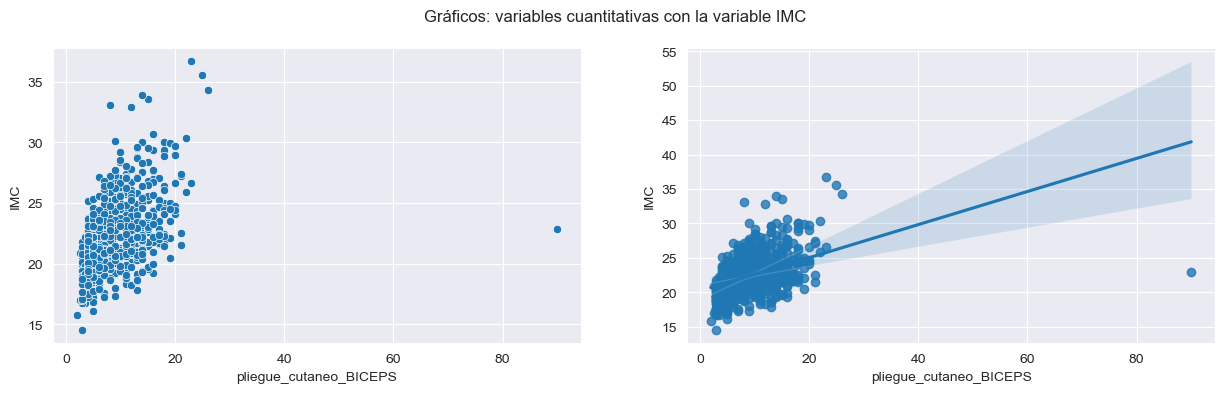

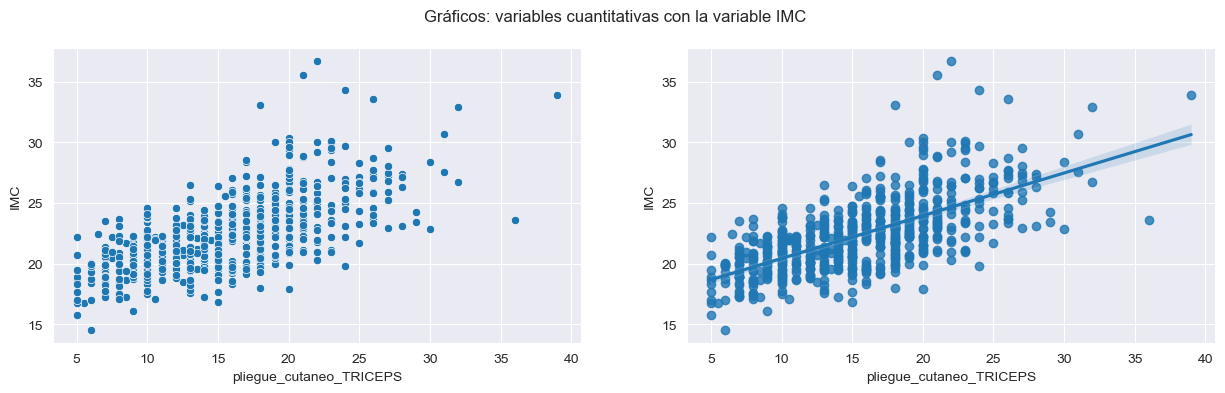

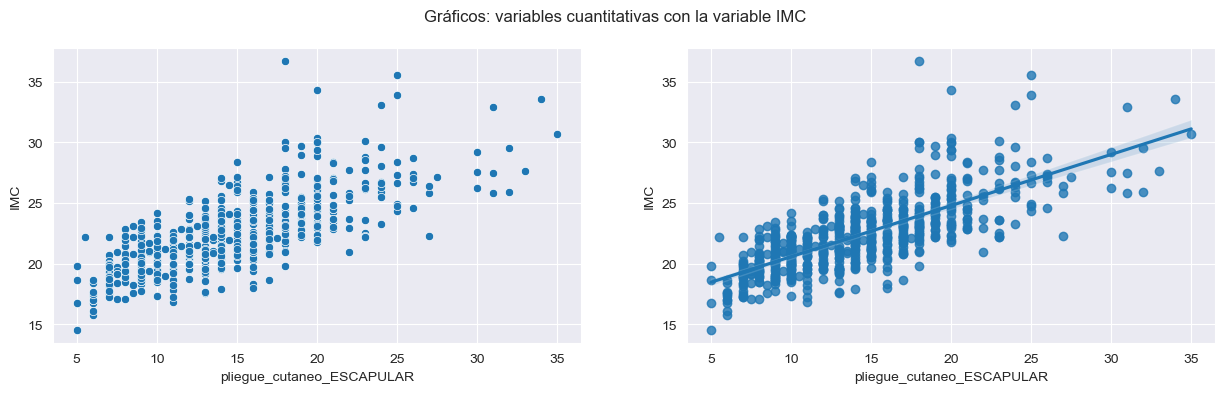

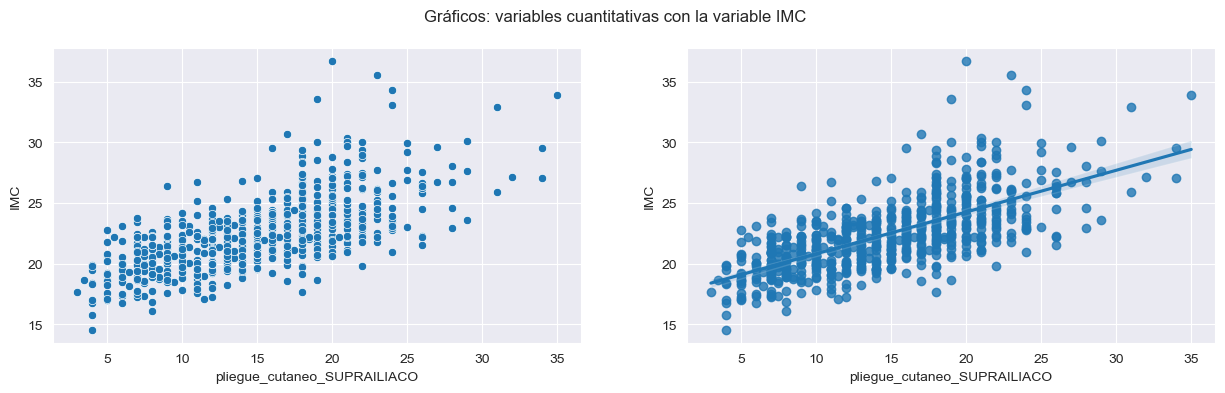

In [47]:
for i, colum in enumerate(var_num):

    fig1, ax1 = plt.subplots(1, 2, figsize=(15, 3.84))
    fig1.suptitle('Gráficos: variables cuantitativas con la variable IMC')

    var = 'IMC'
    var2 = colum

    sns.scatterplot(data=df, x=var2, y=var, ax=ax1[0])
    sns.regplot(data=df, x=var2, y=var, ax=ax1[1])


# Comparacion de variables cuantitativas y cualitativas

## Graficas categoricas y cuantitativas

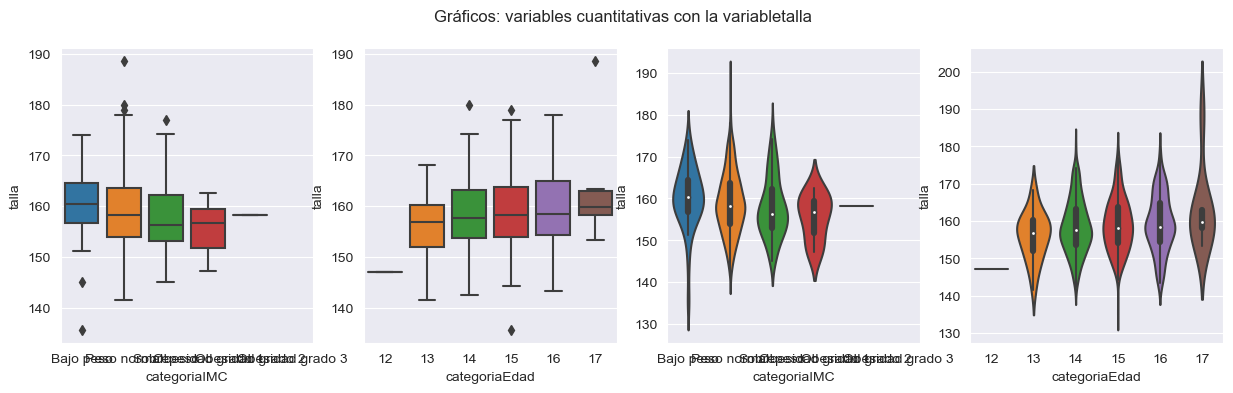

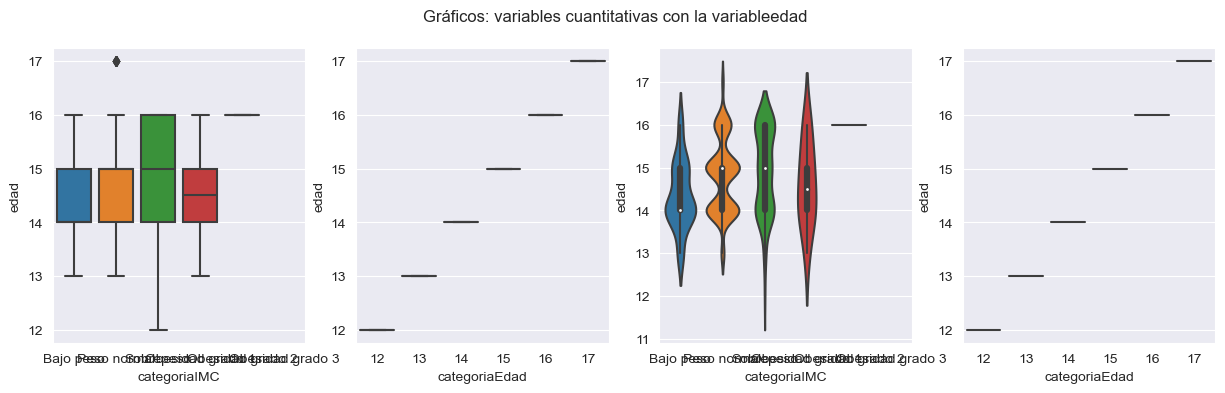

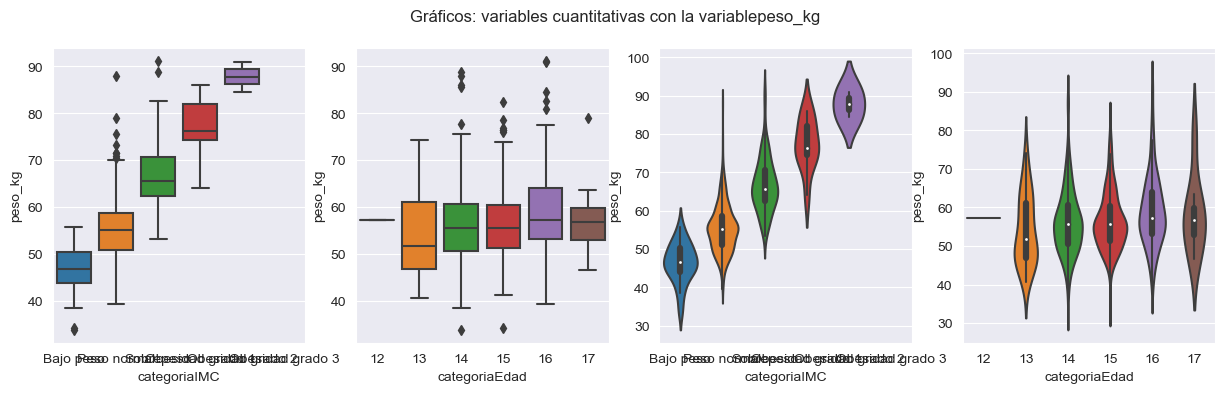

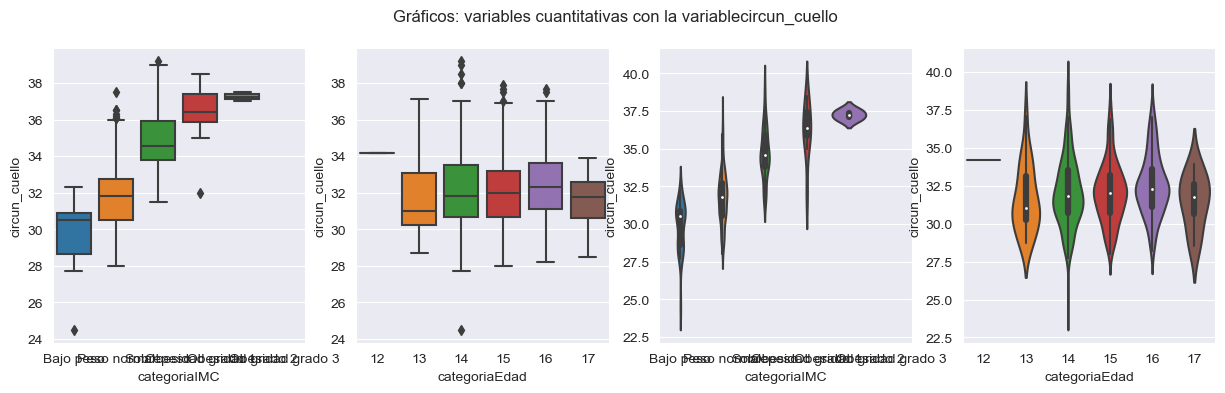

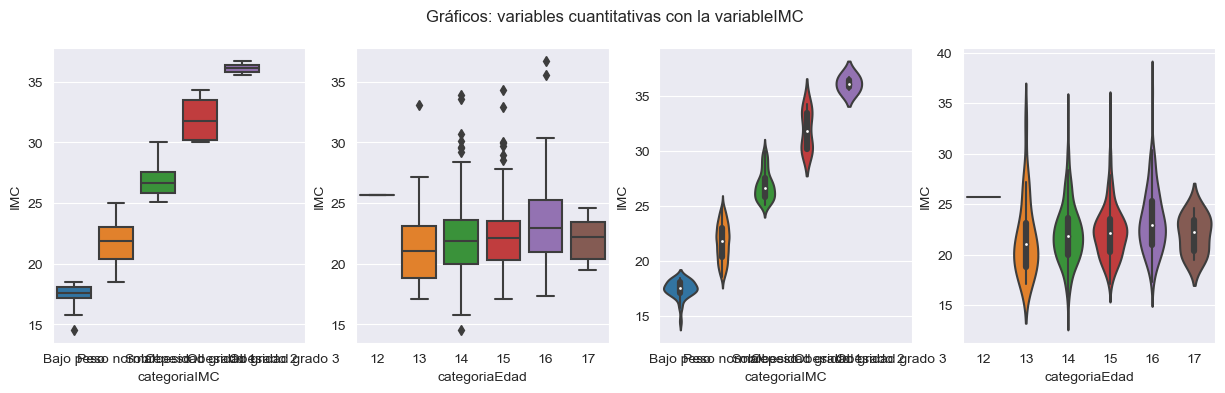

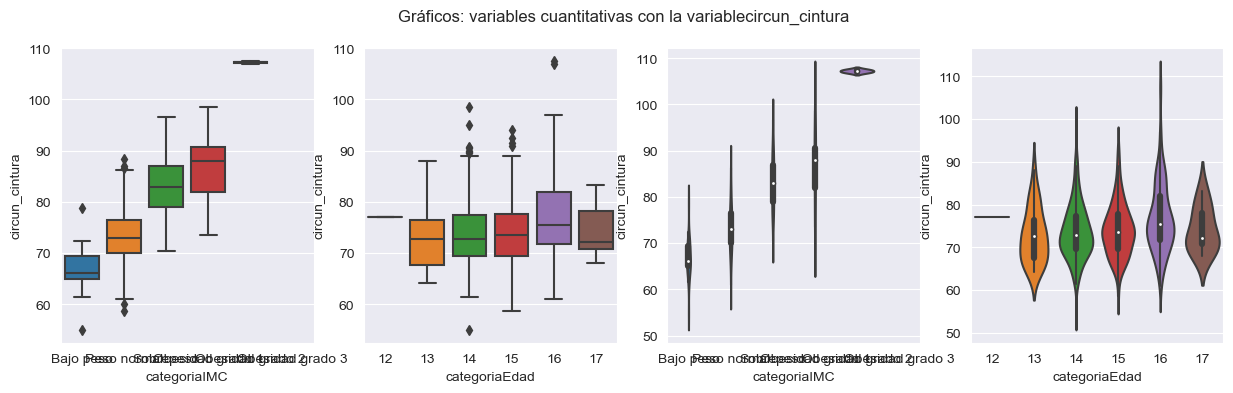

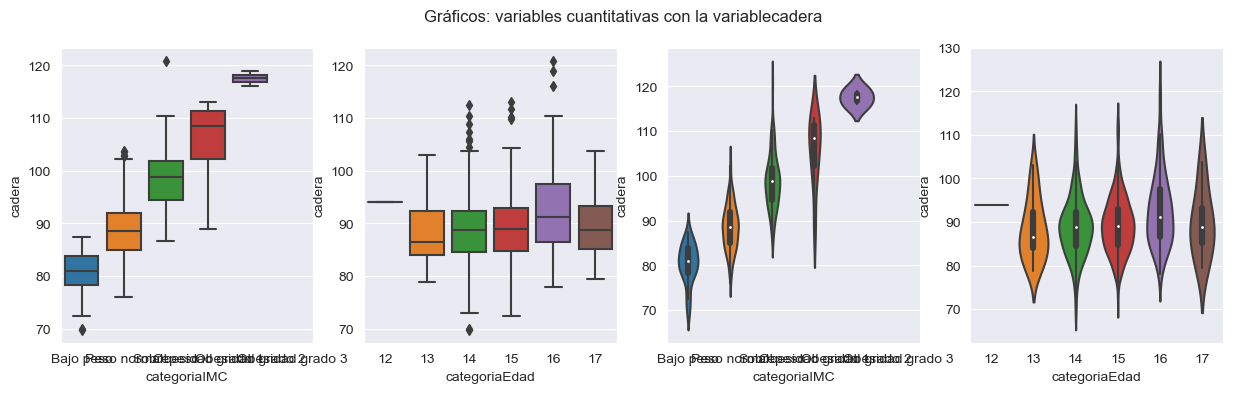

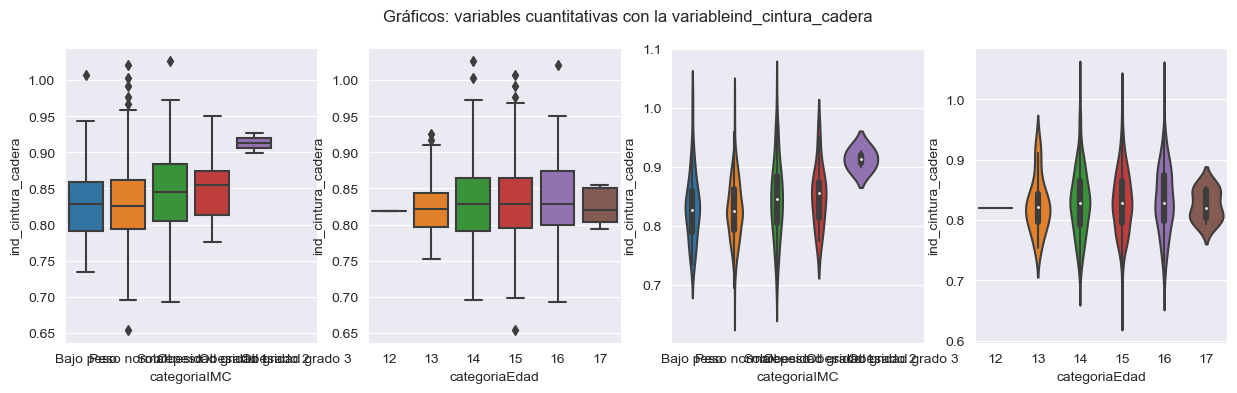

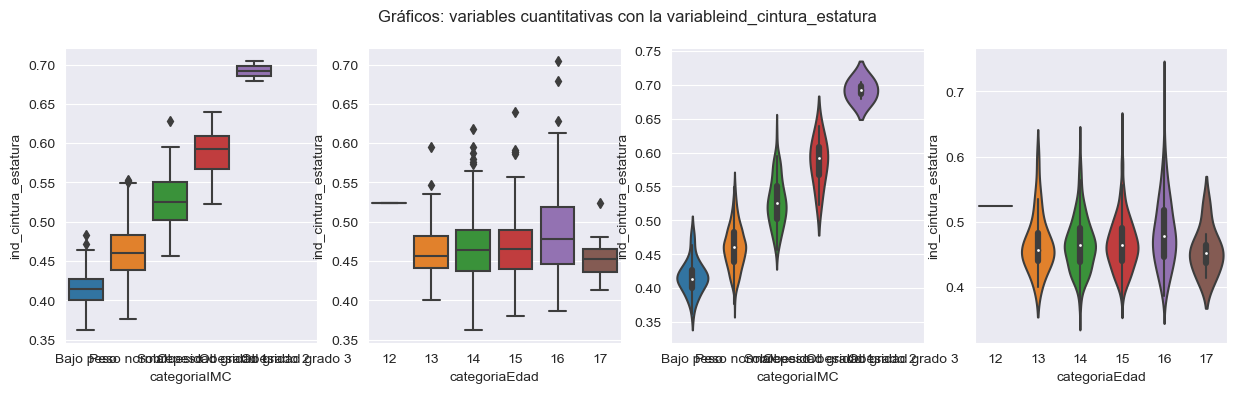

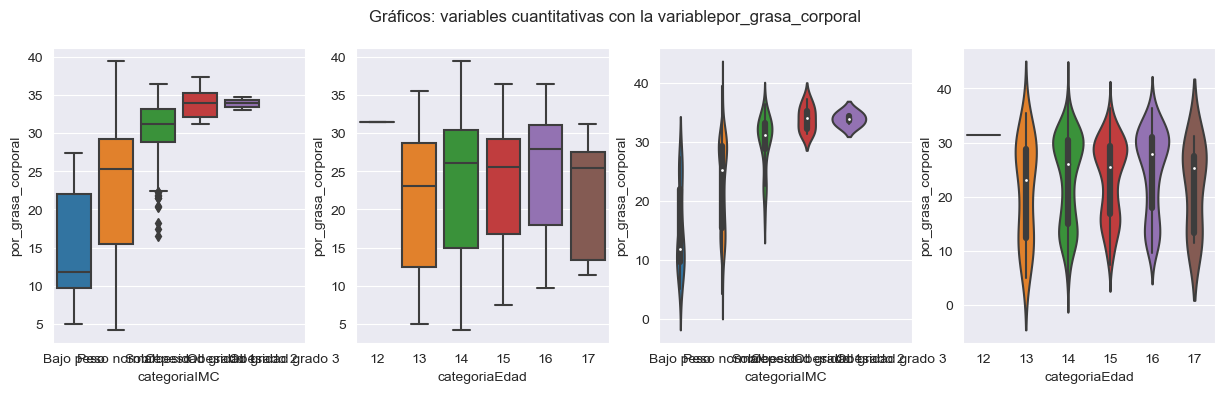

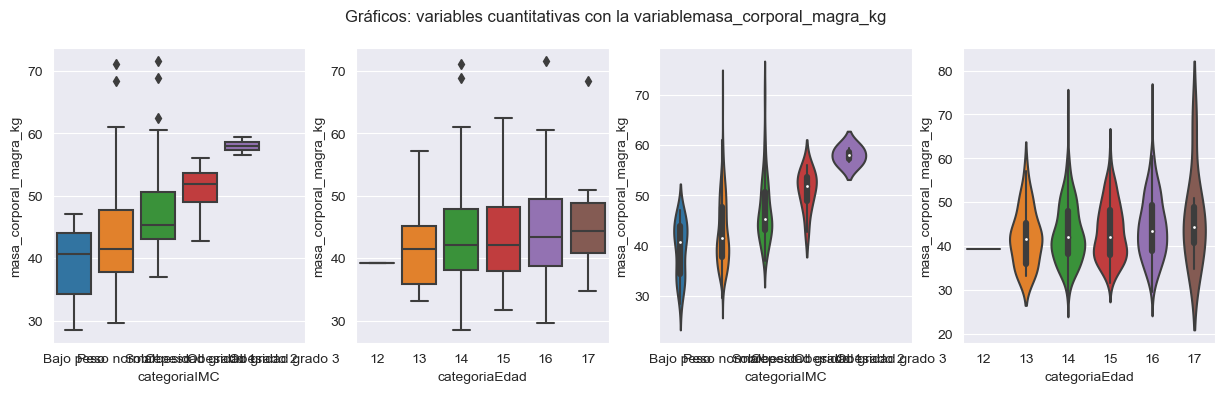

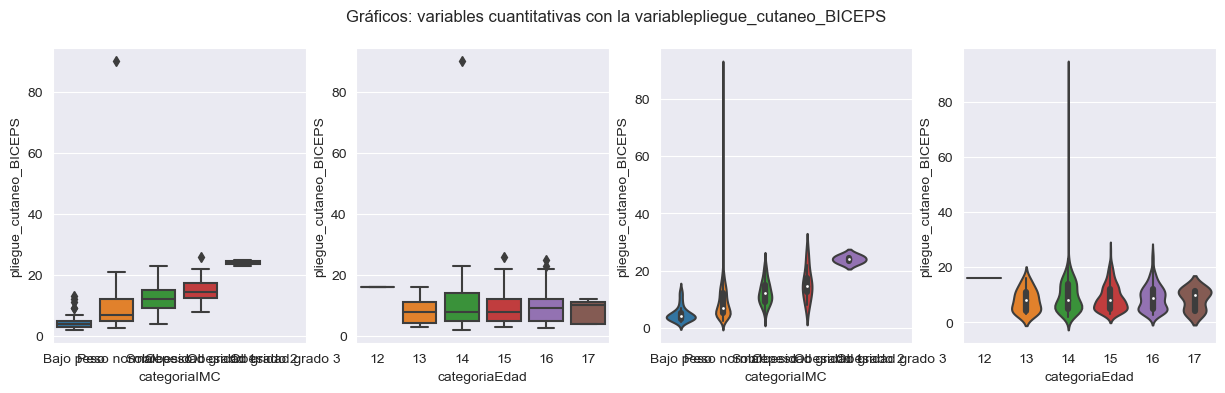

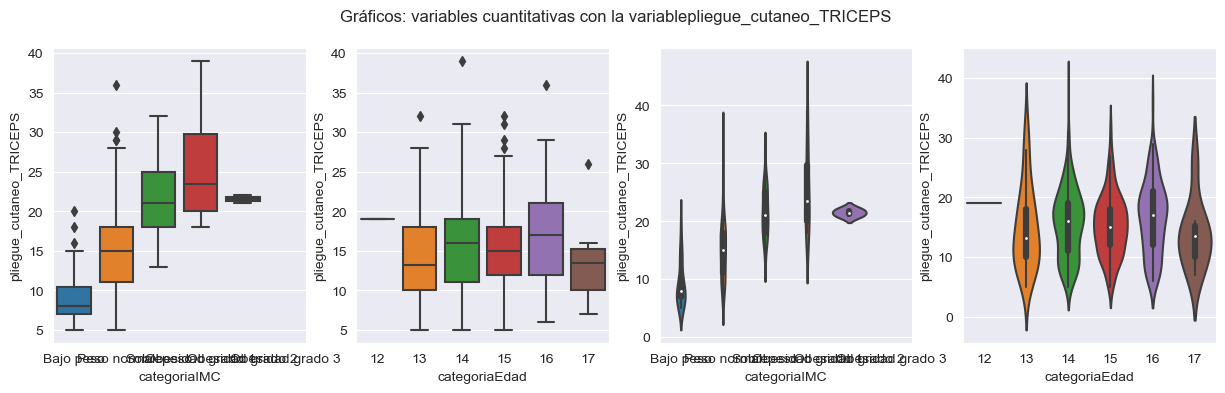

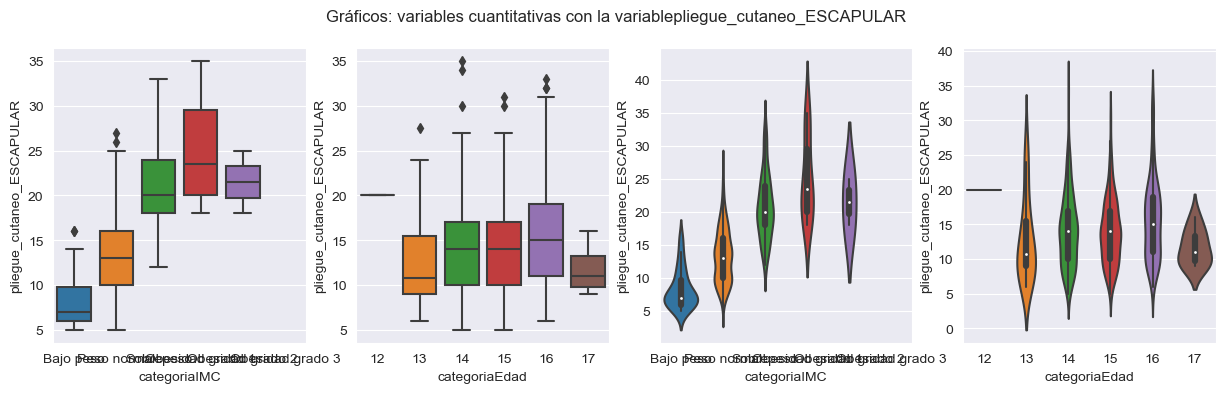

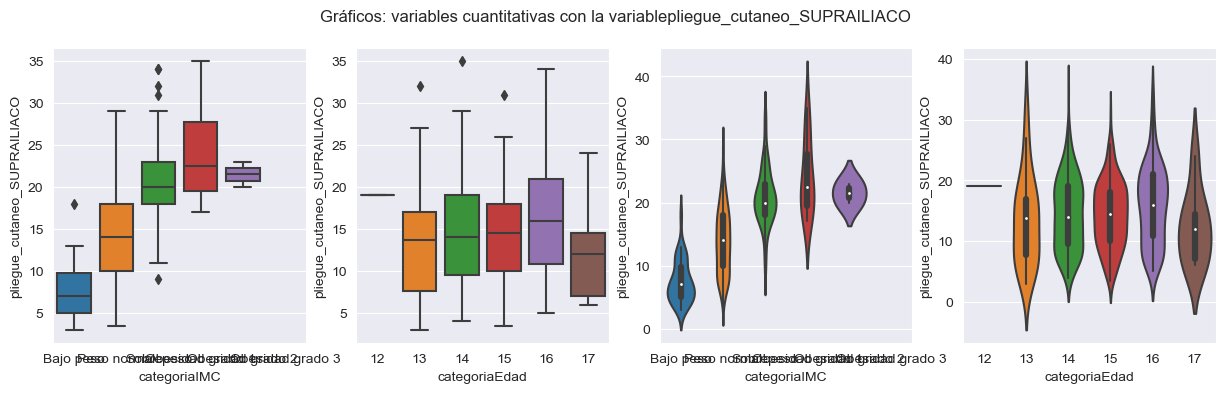

In [86]:
for i, colum in enumerate(var_num):
    fig5, ax5 = plt.subplots(1, 4, figsize=(15, 3.84))
    fig5.suptitle('Gráficos: variables cuantitativas con la variable' + str(colum))

    sns.boxplot(data=df, x='categoriaIMC', y=colum, ax=ax5[0])
    sns.boxplot(data=df, x='categoriaEdad', y=colum, ax=ax5[1])

    sns.violinplot(data=df, x='categoriaIMC', y=colum, ax=ax5[2])
    sns.violinplot(data=df, x='categoriaEdad', y=colum, ax=ax5[3])


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '12'),
  Text(1, 0, '13'),
  Text(2, 0, '14'),
  Text(3, 0, '15'),
  Text(4, 0, '16'),
  Text(5, 0, '17')])

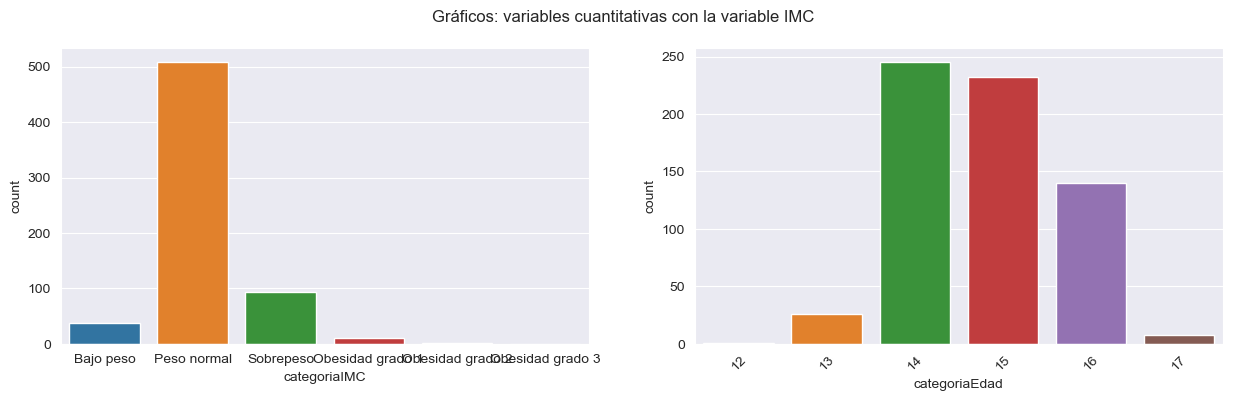

In [68]:
fig4, ax4 = plt.subplots(1, 2, figsize=(15, 3.84))
fig4.suptitle('Gráficos: variables cuantitativas con la variable IMC')

sns.countplot(data=df, x='categoriaIMC', ax=ax4[0])
plt.xticks(rotation=45, fontsize=10)

sns.countplot(data=df, x='categoriaEdad', ax=ax4[1])
plt.xticks(rotation=45, fontsize=10)


## Graficas categoricas

Text(0.5, 22.40625, 'categoriaIMC')

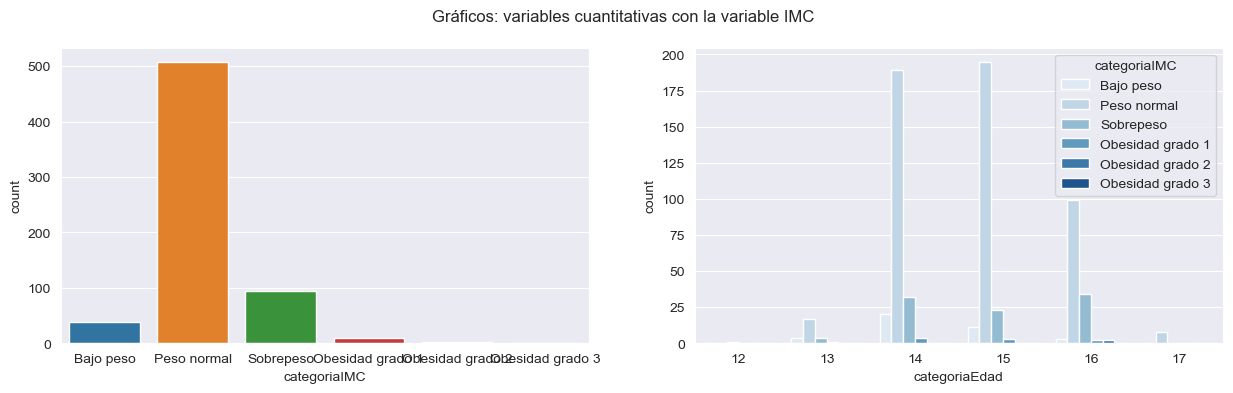

In [72]:
fig4, ax4 = plt.subplots(1, 2, figsize=(15, 3.84))
fig4.suptitle('Gráficos: variables cuantitativas con la variable IMC')


sns.countplot(x='categoriaIMC', data=df, ax=ax4[0])
ax[0].set_title("IMC según Total", fontsize = 10, fontweight = "bold")
ax[0].tick_params(labelsize = 8)
ax[0].set_xlabel('categoriaIMC')

sns.countplot(x='categoriaEdad', hue='categoriaIMC', data=df, palette="Blues", ax=ax4[1])
ax[1].set_title(str(colum) + " según IMC", fontsize = 10, fontweight = "bold")
ax[1].tick_params(labelsize = 8)
ax[1].set_xlabel('categoriaIMC')

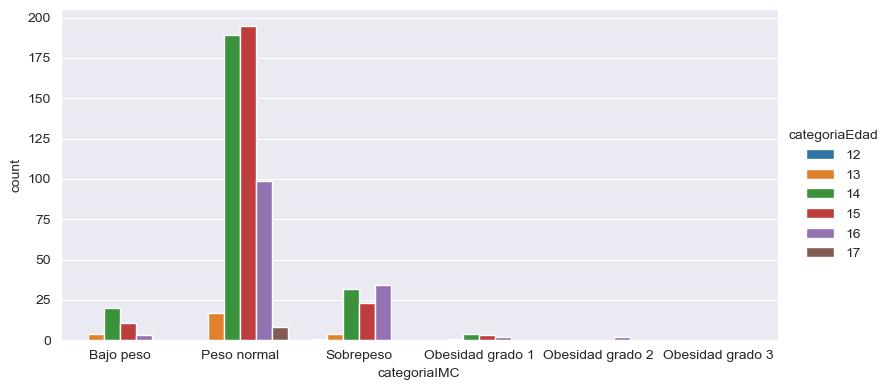

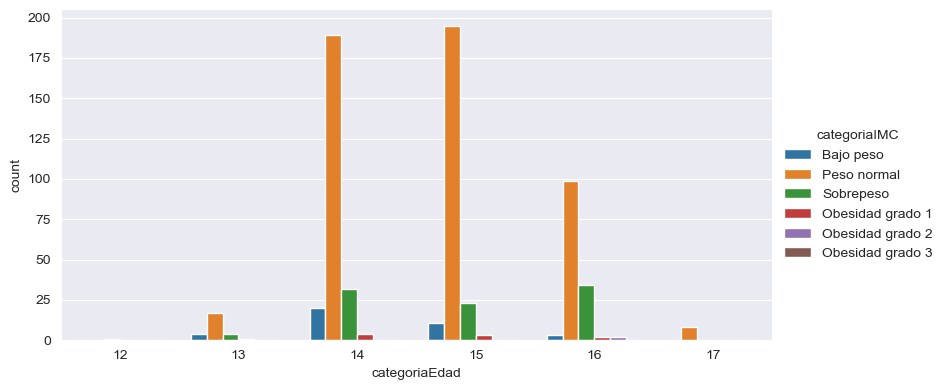

In [75]:
sns.catplot(data=df, x='categoriaIMC', hue='categoriaEdad', kind='count', height=4, aspect=2)
sns.catplot(data=df, x='categoriaEdad', hue='categoriaIMC', kind='count', height=4, aspect=2)


## tablas cruzadas

In [76]:
contingency_table = pd.crosstab(df['categoriaIMC'], df['categoriaEdad'])
print(contingency_table)

categoriaEdad     12  13   14   15  16  17
categoriaIMC                              
Bajo peso          0   4   20   11   3   0
Peso normal        0  17  189  195  99   8
Sobrepeso          1   4   32   23  34   0
Obesidad grado 1   0   1    4    3   2   0
Obesidad grado 2   0   0    0    0   2   0


## Graficas masivas

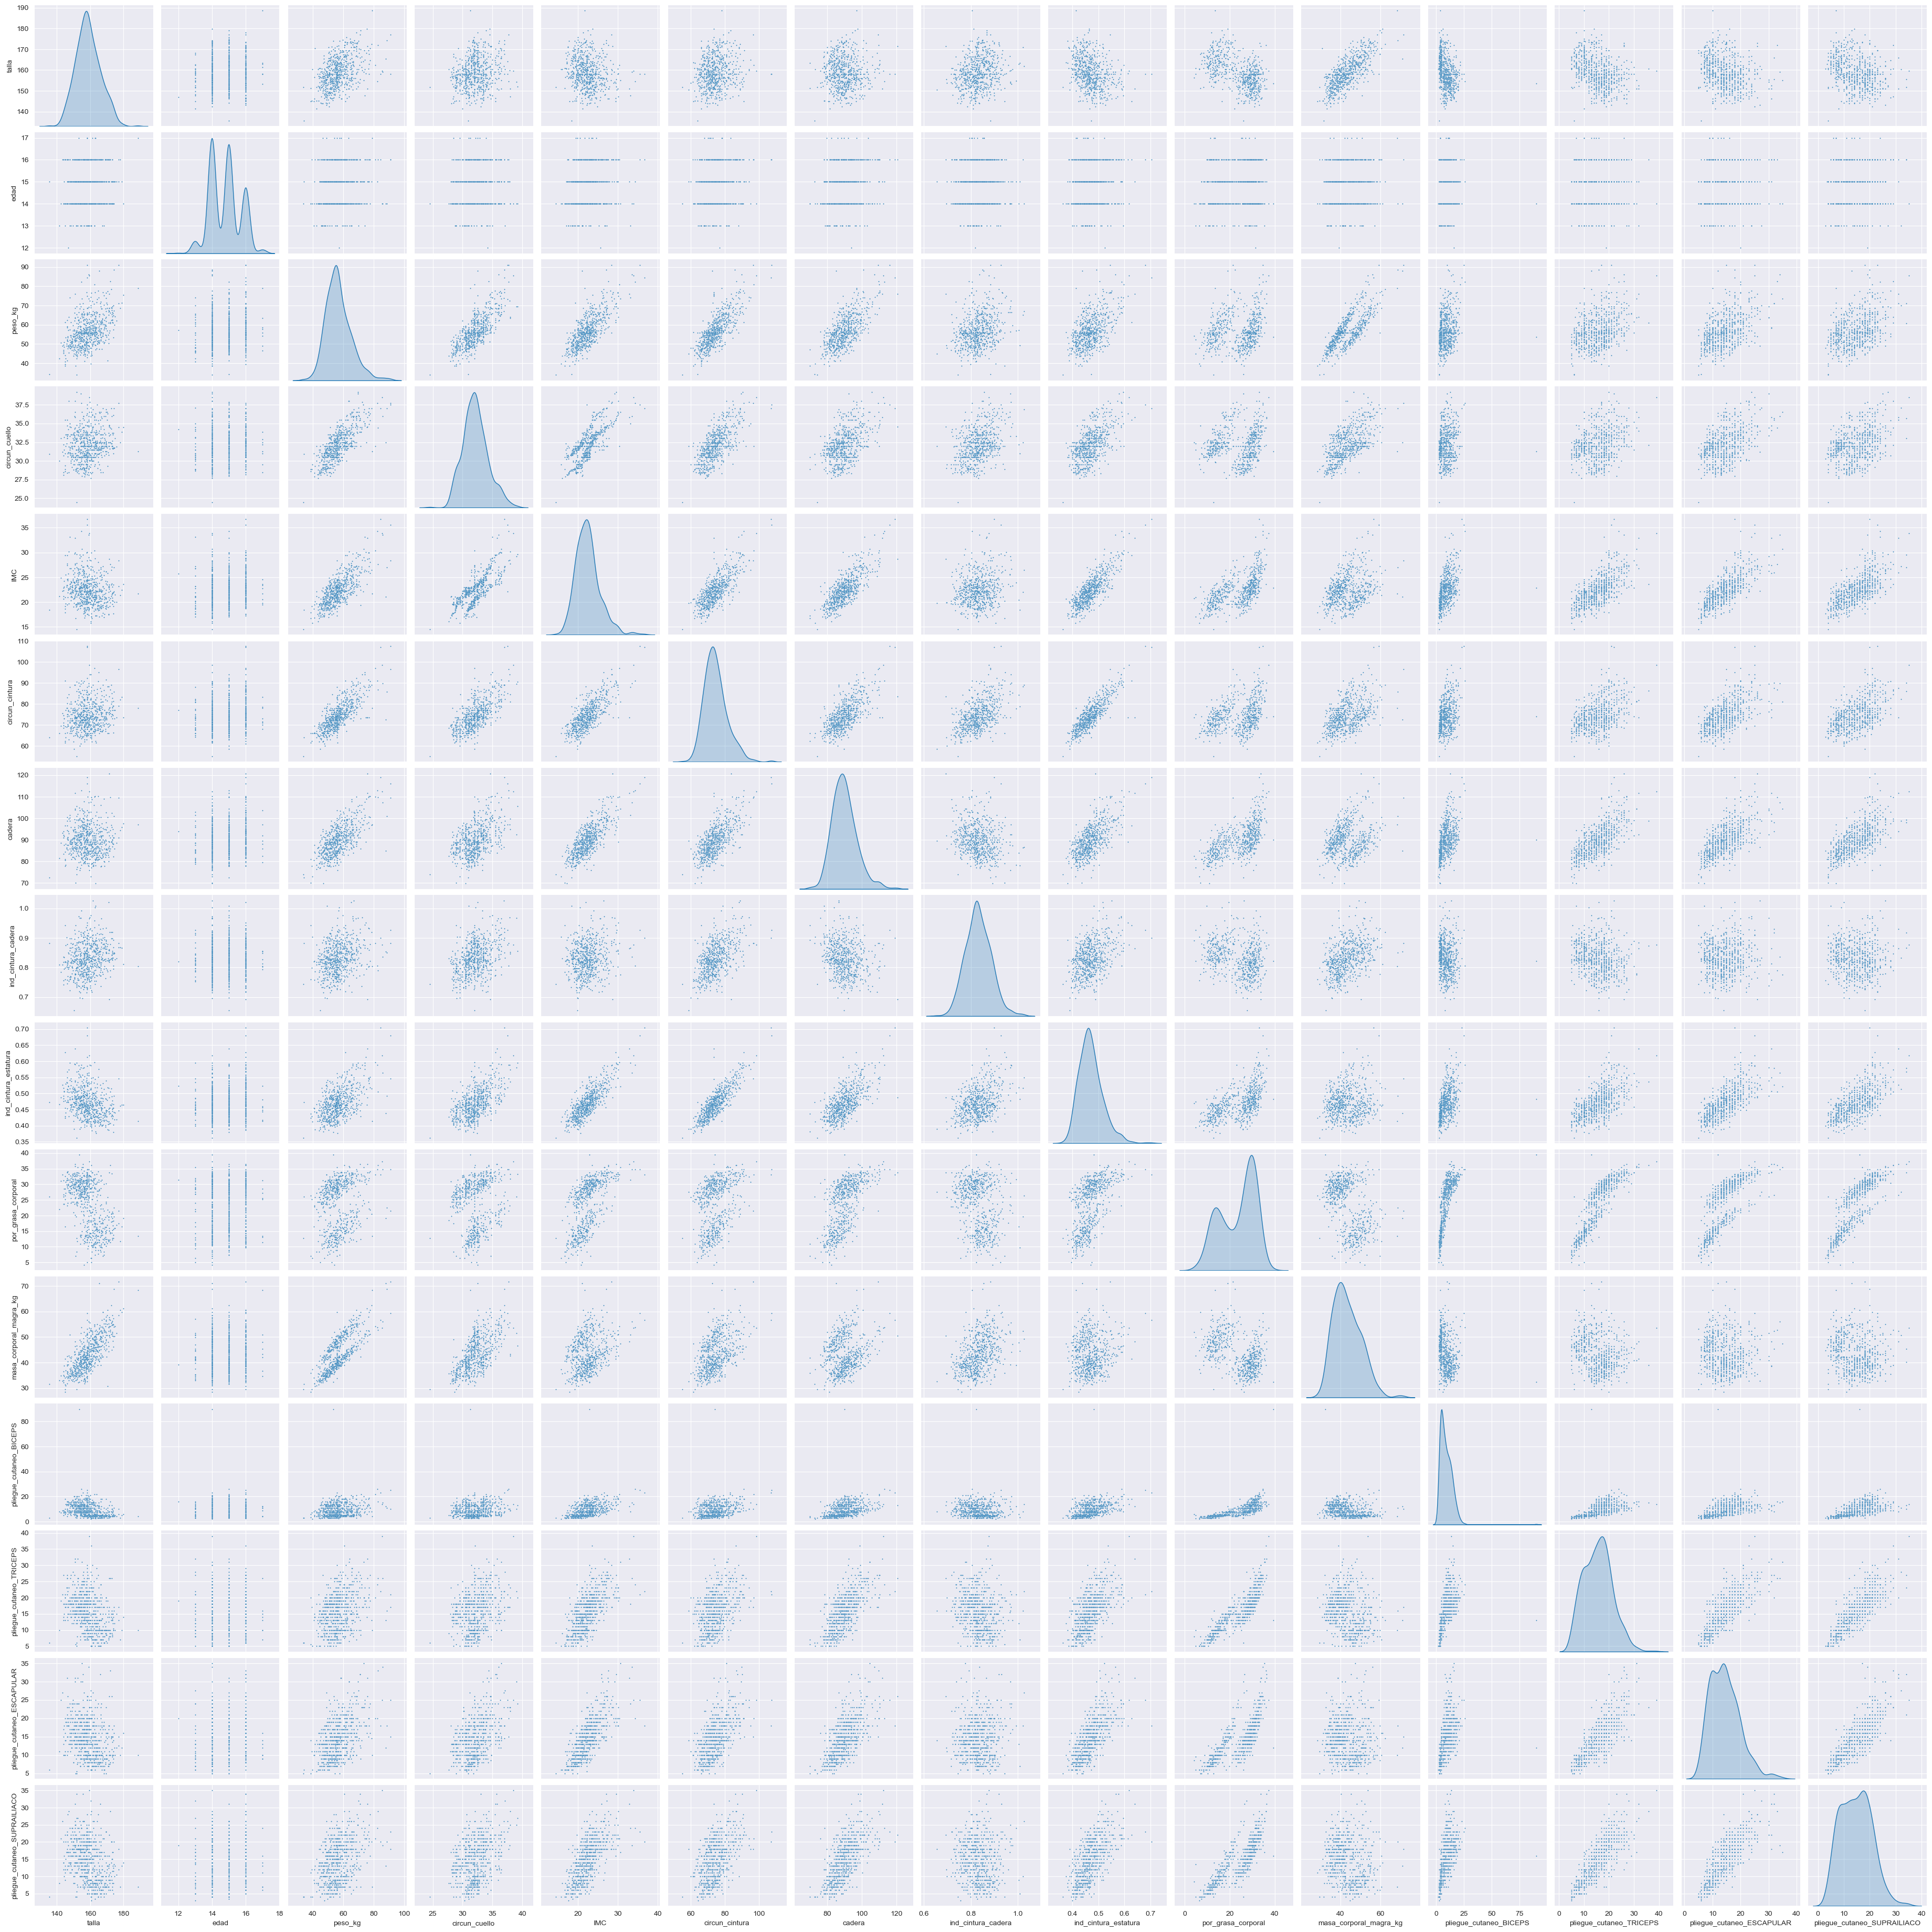

In [77]:
sns.pairplot(df[var_num], plot_kws={"s": 2}, diag_kind='kde');

# Preguntas estadisticas

## Seleccionar individuos por grupo

## Calcular la media de la talla por grupo, Calcular la mediana de la edad por grupo

## Calcular la media de peso por categoría de edad

## Calcular el total de individuos por categoría de IMC

In [89]:
df.to_csv('../data/cleaned/data.csv', index=True)
